In [ ]:
import inkml.inkml2img as conv
import subprocess
import os

from processing import *
from generate_dataset import *
from clf import get_clf
from PIL import Image

import warnings  #suppress warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from prep_HASYv2 import *

In [ ]:
from keras.datasets import mnist
(X_tr,y_tr),(X_ts,y_ts) = mnist.load_data()


### convert INKml to png

good matrix file indices:
82
8


In [ ]:
directory = 'INKdata/MatricesTrain2014/'
out_folder= './MatricesTrain_png/'
#convert_inkml(directory,out_folder)
# directory = 'INKdata/trainData_2012_part1/'
# out_folder= './train2012_png/'


In [ ]:
#get list of png files
png_files = []
f = os.popen("ls %s" %out_folder)
for i in f.readlines():
    png_files.append(out_folder + i[:-1])
f.close()    
# png_files

In [ ]:
# index = 53
index = np.random.randint(len(png_files))
matname = 'images/matrix'+str(index)
# index=579 for firstsetonly
filename = png_files[index]
binary_arr,label_arr, segments = label_segments(filename,matname)
print("index: ",index)

In [ ]:
##unnecessary but "pretty"
plot_numbered_image(label_arr,matname)

In [ ]:
newdir = 'tempimgs/'
fig,axes = plt.subplots(len(segments),1,figsize=(5,len(segments)*5))
for seg,ax in list(zip(segments,axes.flatten())):
    crop_image(seg,label_arr,binary_arr,ax=ax,plot=True,model=fitted_clf,direc=newdir)
fig.savefig(matname+'_predictions.png')
!rm $newdir*

In [ ]:
## THIS IS TRASH
# newdir = 'tempimgs/'
# fig,axes = plt.subplots(len(segments),1,figsize=(5,len(segments)*5))
# for seg,ax in list(zip(segments,axes.flatten())):
#     crop_image(seg,label_arr,binary_arr,ax=ax,plot=True,model=hasy_clf,direc=newdir)
# fig.savefig(matname+'_predictions__HASY.png')
# !rm $newdir*

In [ ]:
# fig,axes = plt.subplots(1,4,figsize=(20,5))
# for img,ax in list(zip(labeled_foursomes[77],axes.flatten())):
#     ax.imshow(img[0])
#     ax.set_title('Label: '+str(img[1]),fontsize=30)
#     ax.set_xticks([])
#     ax.set_yticks([])
# plt.tight_layout();

In [ ]:
fig,axes = plt.subplots(15,1,figsize=(20,70))
for img,ax in list(zip(labeled_4some[:15],axes.flatten())):
    ax.imshow(img[0])
    ax.set_title('Labels: '+str(img[1]),fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout();

In [ ]:
!rm generated_imageset/*

In [ ]:
255-np.array(labeled_foursomes[0][0])

In [244]:
filename = partial_set[0][0]
filename

'generated_imageset/merge_4_0____2929.png'

In [239]:
yhat, acc, fitted_clf = get_clf(X_tr, X_ts, y_tr, y_ts)

In [240]:
partial_set = make_stuff()

In [ ]:
partial_set[0]

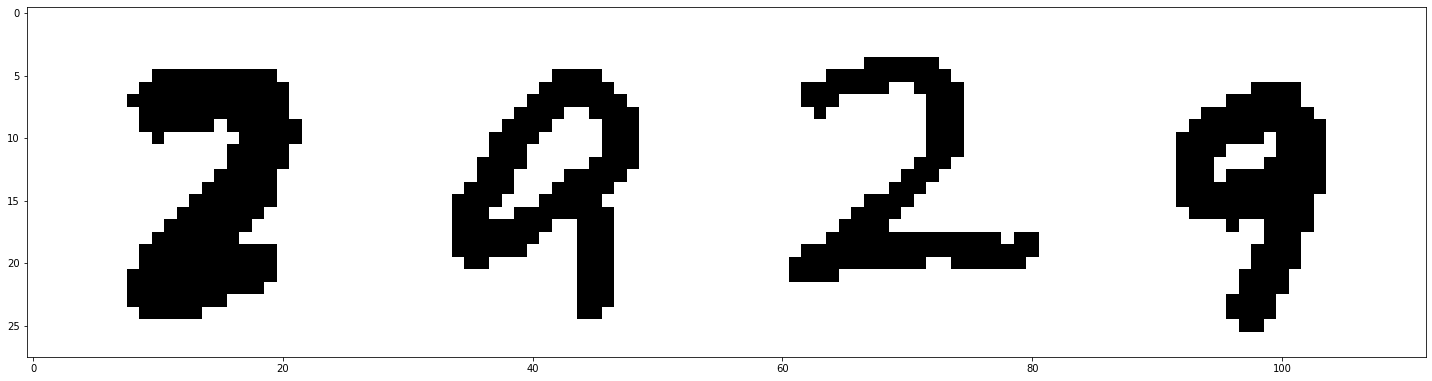

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


number of segments 4


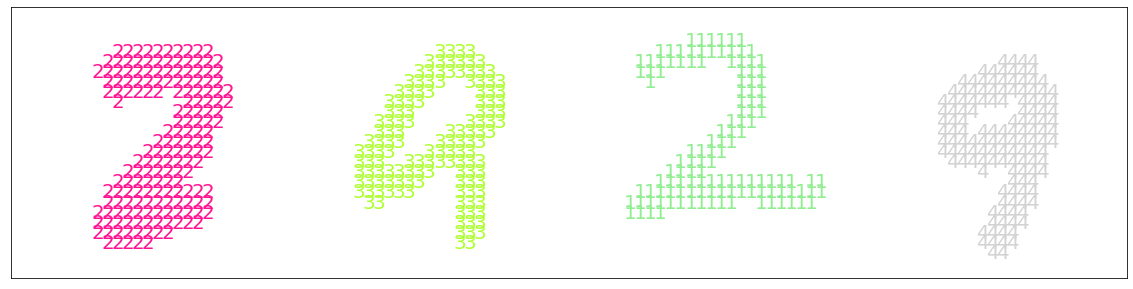

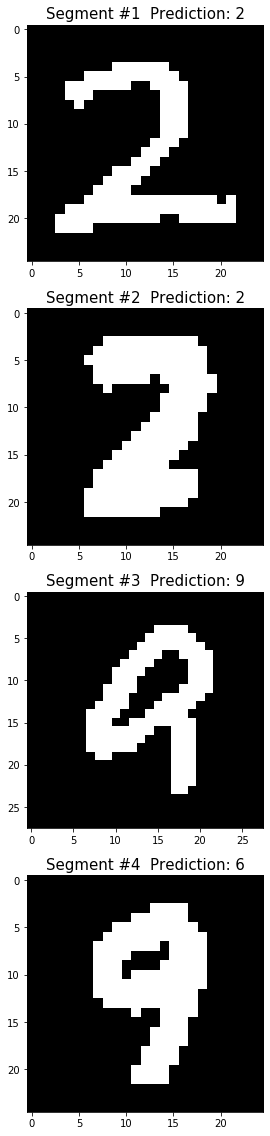

In [241]:
process_image(partial_set[0][0],'TESTINGYO/',fitted_clf)
!rm tempimgs/*

In [421]:
results = pd.DataFrame(partial_set)
results.columns = ['image','truth']
results

,image,truth
0,generated_imageset/merge_4_0____2929.png,"[2, 9, 2, 9]"
1,generated_imageset/merge_4_1____4744.png,"[4, 7, 4, 4]"
2,generated_imageset/merge_4_2____1338.png,"[1, 3, 3, 8]"
3,generated_imageset/merge_4_3____5470.png,"[5, 4, 7, 0]"
4,generated_imageset/merge_4_4____2490.png,"[2, 4, 9, 0]"
...,...,...
2495,generated_imageset/merge_4_2495____4042.png,"[4, 0, 4, 2]"
2496,generated_imageset/merge_4_2496____5409.png,"[5, 4, 0, 9]"
2497,generated_imageset/merge_4_2497____5169.png,"[5, 1, 6, 9]"
2498,generated_imageset/merge_4_2498____1094.png,"[1, 0, 9, 4]"


In [ ]:
def getscore(x):
    correct
    return x['truth']==x['predict']    

In [426]:
predictions=np.array(predictions)
results['predict'] = predictions

In [431]:
results['correct']=results.apply(setdiff,axis=1)
results

,image,truth,predict,correct
0,generated_imageset/merge_4_0____2929.png,"[2, 9, 2, 9]","[2, 9, 2, 4]","[True, True, True, False]"
1,generated_imageset/merge_4_1____4744.png,"[4, 7, 4, 4]","[4, 3, 8, 4]","[True, False, False, True]"
2,generated_imageset/merge_4_2____1338.png,"[1, 3, 3, 8]","[1, 3, 5, 8]","[True, True, False, True]"
3,generated_imageset/merge_4_3____5470.png,"[5, 4, 7, 0]","[4, 4, 5, 5]","[False, True, False, False]"
4,generated_imageset/merge_4_4____2490.png,"[2, 4, 9, 0]","[0, 4, 2, 0]","[False, True, False, True]"
...,...,...,...,...
2495,generated_imageset/merge_4_2495____4042.png,"[4, 0, 4, 2]","[4, 0, 4, 6]","[True, True, True, False]"
2496,generated_imageset/merge_4_2496____5409.png,"[5, 4, 0, 9]","[None, 4, 3, 0, 9]",False
2497,generated_imageset/merge_4_2497____5169.png,"[5, 1, 6, 9]","[None, 8, 1, 5, 4]",False
2498,generated_imageset/merge_4_2498____1094.png,"[1, 0, 9, 4]","[1, 0, 9, 3]","[True, True, True, False]"


In [432]:
results.to_csv('Pass3_results.csv')

In [429]:
def setdiff(x):
    return x['truth']==x['predict']

In [331]:
predictions=np.array(predictions)
results['predict'] = predictions

In [422]:
predictions = []
for index,image in enumerate(results['image']):
    matname = 'Pass2/output__'+str(index)
    print(image)
    predictions.append(process_image(image,matname,fitted_clf))


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


generated_imageset/merge_4_0____2929.png
number of segments 4
generated_imageset/merge_4_1____4744.png
number of segments 4
generated_imageset/merge_4_2____1338.png
number of segments 4
generated_imageset/merge_4_3____5470.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_4____2490.png
number of segments 4
generated_imageset/merge_4_5____2776.png
number of segments 4
generated_imageset/merge_4_6____6607.png
number of segments 4
generated_imageset/merge_4_7____0225.png
number of segments 4
generated_imageset/merge_4_8____6382.png
number of segments 4
generated_imageset/merge_4_9____3395.png
number of segments 4
generated_imageset/merge_4_10____3622.png
number of segments 4
generated_imageset/merge_4_11____7957.png
number of segments 4
generated_imageset/merge_4_12____5085.png
number of segments 4
generated_imageset/merge_4_13____8781.png
number of segments 4
generated_imageset/merge_4_14____6325.png
number of segments 4
generated_imageset/merge_4_15____8998.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_16____5244.png
number of segments 4
generated_imageset/merge_4_17____3219.png
number of segments 4
generated_imageset/merge_4_18____2589.png
number of segments 5
generated_imageset/merge_4_19____0069.png
number of segments 4
generated_imageset/merge_4_20____7829.png
number of segments 4
generated_imageset/merge_4_21____3081.png
number of segments 4
generated_imageset/merge_4_22____3308.png
number of segments 4
generated_imageset/merge_4_23____3311.png
number of segments 4
generated_imageset/merge_4_24____6614.png
number of segments 4
generated_imageset/merge_4_25____9499.png
number of segments 5
generated_imageset/merge_4_26____7004.png
number of segments 4
generated_imageset/merge_4_27____5374.png
number of segments 4
generated_imageset/merge_4_28____1105.png
number of segments 6
generated_imageset/merge_4_29____9038.png
number of segments 4
generated_imageset/merge_4_30____2211.png
number of segments 4
generated_imageset/merge_4_31____1908.png
number of seg

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_35____9577.png
number of segments 4
generated_imageset/merge_4_36____5563.png
number of segments 4
generated_imageset/merge_4_37____8467.png
number of segments 4
generated_imageset/merge_4_38____0748.png
number of segments 4
generated_imageset/merge_4_39____7548.png
number of segments 5
generated_imageset/merge_4_40____7512.png
number of segments 4
generated_imageset/merge_4_41____5223.png
number of segments 4
generated_imageset/merge_4_42____8381.png
number of segments 5
generated_imageset/merge_4_43____9407.png
number of segments 4
generated_imageset/merge_4_44____0540.png
number of segments 4
generated_imageset/merge_4_45____5396.png
number of segments 4
generated_imageset/merge_4_46____8538.png
number of segments 4
generated_imageset/merge_4_47____1708.png
number of segments 4
generated_imageset/merge_4_48____4796.png
number of segments 4
generated_imageset/merge_4_49____0152.png
number of segments 4
generated_imageset/merge_4_50____8

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_53____5645.png
number of segments 4
generated_imageset/merge_4_54____5384.png
number of segments 4
generated_imageset/merge_4_55____1433.png
number of segments 4
generated_imageset/merge_4_56____2315.png
number of segments 4
generated_imageset/merge_4_57____8291.png
number of segments 4
generated_imageset/merge_4_58____5401.png
number of segments 4
generated_imageset/merge_4_59____1303.png
number of segments 4
generated_imageset/merge_4_60____9294.png
number of segments 4
generated_imageset/merge_4_61____6653.png
number of segments 4
generated_imageset/merge_4_62____0213.png
number of segments 4
generated_imageset/merge_4_63____8314.png
number of segments 4
generated_imageset/merge_4_64____8948.png
number of segments 4
generated_imageset/merge_4_65____4488.png
number of segments 4
generated_imageset/merge_4_66____6553.png
number of segments 4
generated_imageset/merge_4_67____7065.png
number of segments 4
generated_imageset/merge_4_68____1996.png
number of seg

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_72____6079.png
number of segments 4
generated_imageset/merge_4_73____3779.png
number of segments 4
generated_imageset/merge_4_74____4063.png
number of segments 4
generated_imageset/merge_4_75____4772.png
number of segments 4
generated_imageset/merge_4_76____1243.png
number of segments 5
generated_imageset/merge_4_77____5128.png
number of segments 6
generated_imageset/merge_4_78____7841.png
number of segments 4
generated_imageset/merge_4_79____0883.png
number of segments 4
generated_imageset/merge_4_80____2238.png
number of segments 4
generated_imageset/merge_4_81____1196.png
number of segments 4
generated_imageset/merge_4_82____0703.png
number of segments 4
generated_imageset/merge_4_83____0210.png
number of segments 4
generated_imageset/merge_4_84____9880.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_85____8168.png
number of segments 4
generated_imageset/merge_4_86____1626.png
number of segments 4
generated_imageset/merge_4_87____0221.png
number of segments 4
generated_imageset/merge_4_88____6156.png
number of segments 4
generated_imageset/merge_4_89____4712.png
number of segments 4
generated_imageset/merge_4_90____5290.png
number of segments 4
generated_imageset/merge_4_91____8674.png
number of segments 4
generated_imageset/merge_4_92____0491.png
number of segments 4
generated_imageset/merge_4_93____2066.png
number of segments 4
generated_imageset/merge_4_94____4213.png
number of segments 4
generated_imageset/merge_4_95____5607.png
number of segments 4
generated_imageset/merge_4_96____0047.png
number of segments 5
generated_imageset/merge_4_97____1027.png
number of segments 4
generated_imageset/merge_4_98____8429.png
number of segments 4
generated_imageset/merge_4_99____6290.png
number of segments 4
generated_imageset/merge_4_100____0192.png
number of se

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_103____8242.png
number of segments 4
generated_imageset/merge_4_104____8688.png
number of segments 6
generated_imageset/merge_4_105____1607.png
number of segments 4
generated_imageset/merge_4_106____1662.png
number of segments 4
generated_imageset/merge_4_107____2544.png
number of segments 4
generated_imageset/merge_4_108____1736.png
number of segments 4
generated_imageset/merge_4_109____6761.png
number of segments 4
generated_imageset/merge_4_110____3370.png
number of segments 4
generated_imageset/merge_4_111____2513.png
number of segments 4
generated_imageset/merge_4_112____7512.png
number of segments 4
generated_imageset/merge_4_113____0178.png
number of segments 4
generated_imageset/merge_4_114____0140.png
number of segments 4
generated_imageset/merge_4_115____1618.png
number of segments 4
generated_imageset/merge_4_116____2610.png
number of segments 4
generated_imageset/merge_4_117____7283.png
number of segments 4
generated_imageset/merge_4_118____2417.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_120____0806.png
number of segments 4
generated_imageset/merge_4_121____6589.png
number of segments 4
generated_imageset/merge_4_122____7760.png
number of segments 4
generated_imageset/merge_4_123____8690.png
number of segments 4
generated_imageset/merge_4_124____1519.png
number of segments 4
generated_imageset/merge_4_125____2919.png
number of segments 4
generated_imageset/merge_4_126____3991.png
number of segments 4
generated_imageset/merge_4_127____6140.png
number of segments 4
generated_imageset/merge_4_128____0577.png
number of segments 5
generated_imageset/merge_4_129____7598.png
number of segments 4
generated_imageset/merge_4_130____2314.png
number of segments 4
generated_imageset/merge_4_131____8187.png
number of segments 5
generated_imageset/merge_4_132____3520.png
number of segments 5
generated_imageset/merge_4_133____4826.png
number of segments 4
generated_imageset/merge_4_134____5897.png
number of segments 4
generated_imageset/merge_4_135____6201.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_138____1152.png
number of segments 4
generated_imageset/merge_4_139____8153.png
number of segments 4
generated_imageset/merge_4_140____0829.png
number of segments 4
generated_imageset/merge_4_141____6120.png
number of segments 4
generated_imageset/merge_4_142____6471.png
number of segments 4
generated_imageset/merge_4_143____7282.png
number of segments 5
generated_imageset/merge_4_144____8111.png
number of segments 4
generated_imageset/merge_4_145____7395.png
number of segments 4
generated_imageset/merge_4_146____4222.png
number of segments 4
generated_imageset/merge_4_147____2791.png
number of segments 4
generated_imageset/merge_4_148____2526.png
number of segments 5
generated_imageset/merge_4_149____7548.png
number of segments 4
generated_imageset/merge_4_150____0542.png
number of segments 4
generated_imageset/merge_4_151____7674.png
number of segments 4
generated_imageset/merge_4_152____0873.png
number of segments 4
generated_imageset/merge_4_153____5659.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_157____0176.png
number of segments 4
generated_imageset/merge_4_158____3331.png
number of segments 5
generated_imageset/merge_4_159____6393.png
number of segments 4
generated_imageset/merge_4_160____8358.png
number of segments 4
generated_imageset/merge_4_161____9603.png
number of segments 4
generated_imageset/merge_4_162____1896.png
number of segments 4
generated_imageset/merge_4_163____1228.png
number of segments 4
generated_imageset/merge_4_164____4462.png
number of segments 4
generated_imageset/merge_4_165____0052.png
number of segments 4
generated_imageset/merge_4_166____8436.png
number of segments 4
generated_imageset/merge_4_167____8889.png
number of segments 4
generated_imageset/merge_4_168____8196.png
number of segments 4
generated_imageset/merge_4_169____4947.png
number of segments 4
generated_imageset/merge_4_170____8326.png
number of segments 4
generated_imageset/merge_4_171____7559.png
number of segments 4
generated_imageset/merge_4_172____8336.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_176____2363.png
number of segments 4
generated_imageset/merge_4_177____3311.png
number of segments 5
generated_imageset/merge_4_178____3560.png
number of segments 4
generated_imageset/merge_4_179____3072.png
number of segments 4
generated_imageset/merge_4_180____3464.png
number of segments 4
generated_imageset/merge_4_181____9550.png
number of segments 5
generated_imageset/merge_4_182____4100.png
number of segments 4
generated_imageset/merge_4_183____1995.png
number of segments 5
generated_imageset/merge_4_184____8248.png
number of segments 4
generated_imageset/merge_4_185____4099.png
number of segments 4
generated_imageset/merge_4_186____0229.png
number of segments 4
generated_imageset/merge_4_187____2815.png
number of segments 4
generated_imageset/merge_4_188____7652.png
number of segments 5
generated_imageset/merge_4_189____3637.png
number of segments 4
generated_imageset/merge_4_190____1491.png
number of segments 4
generated_imageset/merge_4_191____5761.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_196____9921.png
number of segments 4
generated_imageset/merge_4_197____6585.png
number of segments 6
generated_imageset/merge_4_198____2369.png
number of segments 4
generated_imageset/merge_4_199____7261.png
number of segments 6
generated_imageset/merge_4_200____9376.png
number of segments 4
generated_imageset/merge_4_201____6042.png
number of segments 4
generated_imageset/merge_4_202____0481.png
number of segments 4
generated_imageset/merge_4_203____4311.png
number of segments 4
generated_imageset/merge_4_204____4757.png
number of segments 4
generated_imageset/merge_4_205____2336.png
number of segments 4
generated_imageset/merge_4_206____0026.png
number of segments 4
generated_imageset/merge_4_207____2256.png
number of segments 4
generated_imageset/merge_4_208____3712.png
number of segments 4
generated_imageset/merge_4_209____9702.png
number of segments 4
generated_imageset/merge_4_210____9673.png
number of segments 5
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_213____7386.png
number of segments 4
generated_imageset/merge_4_214____1472.png
number of segments 4
generated_imageset/merge_4_215____4703.png
number of segments 4
generated_imageset/merge_4_216____7071.png
number of segments 5
generated_imageset/merge_4_217____7176.png
number of segments 4
generated_imageset/merge_4_218____3090.png
number of segments 4
generated_imageset/merge_4_219____4927.png
number of segments 4
generated_imageset/merge_4_220____6138.png
number of segments 4
generated_imageset/merge_4_221____0260.png
number of segments 4
generated_imageset/merge_4_222____9444.png
number of segments 5
generated_imageset/merge_4_223____4690.png
number of segments 4
generated_imageset/merge_4_224____6927.png
number of segments 4
generated_imageset/merge_4_225____1204.png
number of segments 4
generated_imageset/merge_4_226____7454.png
number of segments 4
generated_imageset/merge_4_227____2181.png
number of segments 4
generated_imageset/merge_4_228____2714.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_232____8672.png
number of segments 4
generated_imageset/merge_4_233____5377.png
number of segments 4
generated_imageset/merge_4_234____4264.png
number of segments 4
generated_imageset/merge_4_235____4581.png
number of segments 4
generated_imageset/merge_4_236____0093.png
number of segments 4
generated_imageset/merge_4_237____9012.png
number of segments 5
generated_imageset/merge_4_238____6915.png
number of segments 4
generated_imageset/merge_4_239____3449.png
number of segments 4
generated_imageset/merge_4_240____4880.png
number of segments 4
generated_imageset/merge_4_241____6122.png
number of segments 4
generated_imageset/merge_4_242____1873.png
number of segments 4
generated_imageset/merge_4_243____7703.png
number of segments 4
generated_imageset/merge_4_244____5750.png
number of segments 4
generated_imageset/merge_4_245____3128.png
number of segments 4
generated_imageset/merge_4_246____6621.png
number of segments 4
generated_imageset/merge_4_247____8592.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_249____2847.png
number of segments 4
generated_imageset/merge_4_250____6060.png
number of segments 4
generated_imageset/merge_4_251____5190.png
number of segments 4
generated_imageset/merge_4_252____4435.png
number of segments 4
generated_imageset/merge_4_253____3756.png
number of segments 4
generated_imageset/merge_4_254____9806.png
number of segments 4
generated_imageset/merge_4_255____5706.png
number of segments 4
generated_imageset/merge_4_256____2236.png
number of segments 4
generated_imageset/merge_4_257____9788.png
number of segments 4
generated_imageset/merge_4_258____8033.png
number of segments 6
generated_imageset/merge_4_259____6319.png
number of segments 4
generated_imageset/merge_4_260____3154.png
number of segments 4
generated_imageset/merge_4_261____8471.png
number of segments 4
generated_imageset/merge_4_262____9154.png
number of segments 4
generated_imageset/merge_4_263____0898.png
number of segments 4
generated_imageset/merge_4_264____1682.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_266____7003.png
number of segments 4
generated_imageset/merge_4_267____9170.png
number of segments 4
generated_imageset/merge_4_268____3601.png
number of segments 4
generated_imageset/merge_4_269____5885.png
number of segments 4
generated_imageset/merge_4_270____7312.png
number of segments 4
generated_imageset/merge_4_271____1958.png
number of segments 4
generated_imageset/merge_4_272____7773.png
number of segments 4
generated_imageset/merge_4_273____7294.png
number of segments 4
generated_imageset/merge_4_274____6738.png
number of segments 4
generated_imageset/merge_4_275____4622.png
number of segments 4
generated_imageset/merge_4_276____4115.png
number of segments 4
generated_imageset/merge_4_277____6062.png
number of segments 4
generated_imageset/merge_4_278____5435.png
number of segments 4
generated_imageset/merge_4_279____8749.png
number of segments 4
generated_imageset/merge_4_280____2084.png
number of segments 4
generated_imageset/merge_4_281____4240.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
generated_imageset/merge_4_284____2413.png
number of segments 4
generated_imageset/merge_4_285____5249.png
number of segments 4
generated_imageset/merge_4_286____1869.png
number of segments 4
generated_imageset/merge_4_287____5340.png
number of segments 4
generated_imageset/merge_4_288____0799.png
number of segments 4
generated_imageset/merge_4_289____8104.png
number of segments 4
generated_imageset/merge_4_290____1260.png
number of segments 6
generated_imageset/merge_4_291____8897.png
number of segments 4
generated_imageset/merge_4_292____4087.png
number of segments 4
generated_imageset/merge_4_293____3971.png
number of segments 4
generated_imageset/merge_4_294____1130.png
number of segments 6
generated_imageset/merge_4_295____0866.png
number of segments 4
generated_imageset/merge_4_296____7305.png
number of segments 4
generated_imageset/merge_4_297____7033.png
number of segments 4
generated_imageset/merge_4_298____7307.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_302____0959.png
number of segments 5
generated_imageset/merge_4_303____3416.png
number of segments 4
generated_imageset/merge_4_304____8775.png
number of segments 4
generated_imageset/merge_4_305____9403.png
number of segments 4
generated_imageset/merge_4_306____7439.png
number of segments 4
generated_imageset/merge_4_307____7179.png
number of segments 4
generated_imageset/merge_4_308____9451.png
number of segments 4
generated_imageset/merge_4_309____6491.png
number of segments 4
generated_imageset/merge_4_310____9569.png
number of segments 4
generated_imageset/merge_4_311____8282.png
number of segments 4
generated_imageset/merge_4_312____1457.png
number of segments 4
generated_imageset/merge_4_313____0406.png
number of segments 4
generated_imageset/merge_4_314____8240.png
number of segments 4
generated_imageset/merge_4_315____1138.png
number of segments 4
generated_imageset/merge_4_316____0357.png
number of segments 4
generated_imageset/merge_4_317____0631.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_320____2534.png
number of segments 4
generated_imageset/merge_4_321____5731.png
number of segments 4
generated_imageset/merge_4_322____6677.png
number of segments 4
generated_imageset/merge_4_323____7993.png
number of segments 4
generated_imageset/merge_4_324____4763.png
number of segments 4
generated_imageset/merge_4_325____1164.png
number of segments 4
generated_imageset/merge_4_326____9163.png
number of segments 6
generated_imageset/merge_4_327____0092.png
number of segments 4
generated_imageset/merge_4_328____2825.png
number of segments 4
generated_imageset/merge_4_329____9687.png
number of segments 4
generated_imageset/merge_4_330____3876.png
number of segments 4
generated_imageset/merge_4_331____8593.png
number of segments 4
generated_imageset/merge_4_332____1016.png
number of segments 4
generated_imageset/merge_4_333____5011.png
number of segments 4
generated_imageset/merge_4_334____8447.png
number of segments 4
generated_imageset/merge_4_335____1976.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_338____7991.png
number of segments 4
generated_imageset/merge_4_339____9861.png
number of segments 5
generated_imageset/merge_4_340____5360.png
number of segments 5
generated_imageset/merge_4_341____6583.png
number of segments 4
generated_imageset/merge_4_342____0446.png
number of segments 4
generated_imageset/merge_4_343____9610.png
number of segments 4
generated_imageset/merge_4_344____6739.png
number of segments 4
generated_imageset/merge_4_345____5043.png
number of segments 4
generated_imageset/merge_4_346____7954.png
number of segments 4
generated_imageset/merge_4_347____6833.png
number of segments 4
generated_imageset/merge_4_348____1235.png
number of segments 4
generated_imageset/merge_4_349____0563.png
number of segments 4
generated_imageset/merge_4_350____6678.png
number of segments 4
generated_imageset/merge_4_351____8354.png
number of segments 4
generated_imageset/merge_4_352____1527.png
number of segments 4
generated_imageset/merge_4_353____6923.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_357____6768.png
number of segments 4
generated_imageset/merge_4_358____0867.png
number of segments 4
generated_imageset/merge_4_359____8888.png
number of segments 4
generated_imageset/merge_4_360____7139.png
number of segments 4
generated_imageset/merge_4_361____1798.png
number of segments 4
generated_imageset/merge_4_362____6509.png
number of segments 4
generated_imageset/merge_4_363____9341.png
number of segments 4
generated_imageset/merge_4_364____7279.png
number of segments 4
generated_imageset/merge_4_365____4884.png
number of segments 4
generated_imageset/merge_4_366____0550.png
number of segments 4
generated_imageset/merge_4_367____0958.png
number of segments 4
generated_imageset/merge_4_368____0865.png
number of segments 4
generated_imageset/merge_4_369____0067.png
number of segments 4
generated_imageset/merge_4_370____7227.png
number of segments 4
generated_imageset/merge_4_371____2996.png
number of segments 4
generated_imageset/merge_4_372____1107.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_376____1011.png
number of segments 4
generated_imageset/merge_4_377____0335.png
number of segments 4
generated_imageset/merge_4_378____4038.png
number of segments 4
generated_imageset/merge_4_379____8936.png
number of segments 4
generated_imageset/merge_4_380____0780.png
number of segments 4
generated_imageset/merge_4_381____4543.png
number of segments 4
generated_imageset/merge_4_382____9173.png
number of segments 4
generated_imageset/merge_4_383____4201.png
number of segments 4
generated_imageset/merge_4_384____9809.png
number of segments 4
generated_imageset/merge_4_385____8922.png
number of segments 4
generated_imageset/merge_4_386____1910.png
number of segments 4
generated_imageset/merge_4_387____1995.png
number of segments 4
generated_imageset/merge_4_388____8804.png
number of segments 4
generated_imageset/merge_4_389____9735.png
number of segments 4
generated_imageset/merge_4_390____0212.png
number of segments 5
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_394____6430.png
number of segments 4
generated_imageset/merge_4_395____1822.png
number of segments 4
generated_imageset/merge_4_396____8503.png
number of segments 5
generated_imageset/merge_4_397____5962.png
number of segments 4
generated_imageset/merge_4_398____9232.png
number of segments 4
generated_imageset/merge_4_399____2106.png
number of segments 4
generated_imageset/merge_4_400____9681.png
number of segments 4
generated_imageset/merge_4_401____2872.png
number of segments 4
generated_imageset/merge_4_402____2295.png
number of segments 4
generated_imageset/merge_4_403____3647.png
number of segments 4
generated_imageset/merge_4_404____2461.png
number of segments 4
generated_imageset/merge_4_405____7182.png
number of segments 4
generated_imageset/merge_4_406____2211.png
number of segments 4
generated_imageset/merge_4_407____9277.png
number of segments 4
generated_imageset/merge_4_408____9145.png
number of segments 4
generated_imageset/merge_4_409____3738.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_414____3585.png
number of segments 4
generated_imageset/merge_4_415____6174.png
number of segments 4
generated_imageset/merge_4_416____7039.png
number of segments 4
generated_imageset/merge_4_417____2492.png
number of segments 4
generated_imageset/merge_4_418____2785.png
number of segments 4
generated_imageset/merge_4_419____9735.png
number of segments 4
generated_imageset/merge_4_420____8593.png
number of segments 4
generated_imageset/merge_4_421____6746.png
number of segments 4
generated_imageset/merge_4_422____0542.png
number of segments 4
generated_imageset/merge_4_423____8922.png
number of segments 4
generated_imageset/merge_4_424____8296.png
number of segments 4
generated_imageset/merge_4_425____5860.png
number of segments 4
generated_imageset/merge_4_426____4741.png
number of segments 4
generated_imageset/merge_4_427____2517.png
number of segments 4
generated_imageset/merge_4_428____8109.png
number of segments 5
generated_imageset/merge_4_429____5119.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_434____2220.png
number of segments 4
generated_imageset/merge_4_435____0569.png
number of segments 5
generated_imageset/merge_4_436____9348.png
number of segments 4
generated_imageset/merge_4_437____0910.png
number of segments 5
generated_imageset/merge_4_438____0421.png
number of segments 4
generated_imageset/merge_4_439____3884.png
number of segments 4
generated_imageset/merge_4_440____1711.png
number of segments 4
generated_imageset/merge_4_441____0480.png
number of segments 4
generated_imageset/merge_4_442____1385.png
number of segments 4
generated_imageset/merge_4_443____2543.png
number of segments 4
generated_imageset/merge_4_444____7277.png
number of segments 4
generated_imageset/merge_4_445____2808.png
number of segments 4
generated_imageset/merge_4_446____0833.png
number of segments 4
generated_imageset/merge_4_447____0800.png
number of segments 4
generated_imageset/merge_4_448____2145.png
number of segments 5
generated_imageset/merge_4_449____7866.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_452____6211.png
number of segments 4
generated_imageset/merge_4_453____1373.png
number of segments 4
generated_imageset/merge_4_454____2289.png
number of segments 4
generated_imageset/merge_4_455____2461.png
number of segments 4
generated_imageset/merge_4_456____3052.png
number of segments 4
generated_imageset/merge_4_457____4947.png
number of segments 4
generated_imageset/merge_4_458____6184.png
number of segments 4
generated_imageset/merge_4_459____5515.png
number of segments 4
generated_imageset/merge_4_460____2651.png
number of segments 4
generated_imageset/merge_4_461____6125.png
number of segments 4
generated_imageset/merge_4_462____9314.png
number of segments 4
generated_imageset/merge_4_463____0472.png
number of segments 4
generated_imageset/merge_4_464____9246.png
number of segments 4
generated_imageset/merge_4_465____1559.png
number of segments 4
generated_imageset/merge_4_466____3796.png
number of segments 4
generated_imageset/merge_4_467____7174.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_471____7327.png
number of segments 4
generated_imageset/merge_4_472____9238.png
number of segments 6
generated_imageset/merge_4_473____4017.png
number of segments 4
generated_imageset/merge_4_474____8735.png
number of segments 5
generated_imageset/merge_4_475____1876.png
number of segments 7
generated_imageset/merge_4_476____2848.png
number of segments 4
generated_imageset/merge_4_477____9112.png
number of segments 5
generated_imageset/merge_4_478____0099.png
number of segments 4
generated_imageset/merge_4_479____9258.png
number of segments 4
generated_imageset/merge_4_480____5816.png
number of segments 4
generated_imageset/merge_4_481____3817.png
number of segments 4
generated_imageset/merge_4_482____2558.png
number of segments 4
generated_imageset/merge_4_483____1859.png
number of segments 4
generated_imageset/merge_4_484____4876.png
number of segments 4
generated_imageset/merge_4_485____4964.png
number of segments 4
generated_imageset/merge_4_486____6848.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_488____7803.png
number of segments 4
generated_imageset/merge_4_489____2360.png
number of segments 4
generated_imageset/merge_4_490____9157.png
number of segments 4
generated_imageset/merge_4_491____7049.png
number of segments 4
generated_imageset/merge_4_492____0224.png
number of segments 4
generated_imageset/merge_4_493____5682.png
number of segments 4
generated_imageset/merge_4_494____3406.png
number of segments 4
generated_imageset/merge_4_495____9380.png
number of segments 4
generated_imageset/merge_4_496____8865.png
number of segments 4
generated_imageset/merge_4_497____1804.png
number of segments 4
generated_imageset/merge_4_498____5113.png
number of segments 4
generated_imageset/merge_4_499____5526.png
number of segments 4
generated_imageset/merge_4_500____9873.png
number of segments 4
generated_imageset/merge_4_501____5224.png
number of segments 5
generated_imageset/merge_4_502____8721.png
number of segments 4
generated_imageset/merge_4_503____1455.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_506____0331.png
number of segments 4
generated_imageset/merge_4_507____2785.png
number of segments 4
generated_imageset/merge_4_508____9694.png
number of segments 4
generated_imageset/merge_4_509____4778.png
number of segments 4
generated_imageset/merge_4_510____8485.png
number of segments 4
generated_imageset/merge_4_511____9429.png
number of segments 4
generated_imageset/merge_4_512____3986.png
number of segments 4
generated_imageset/merge_4_513____7721.png
number of segments 4
generated_imageset/merge_4_514____1716.png
number of segments 4
generated_imageset/merge_4_515____5073.png
number of segments 4
generated_imageset/merge_4_516____3322.png
number of segments 5
generated_imageset/merge_4_517____1995.png
number of segments 4
generated_imageset/merge_4_518____3580.png
number of segments 4
generated_imageset/merge_4_519____3398.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_520____2923.png
number of segments 4
generated_imageset/merge_4_521____6923.png
number of segments 4
generated_imageset/merge_4_522____1768.png
number of segments 4
generated_imageset/merge_4_523____9390.png
number of segments 4
generated_imageset/merge_4_524____1139.png
number of segments 4
generated_imageset/merge_4_525____9963.png
number of segments 4
generated_imageset/merge_4_526____3938.png
number of segments 4
generated_imageset/merge_4_527____4770.png
number of segments 4
generated_imageset/merge_4_528____9143.png
number of segments 7
generated_imageset/merge_4_529____4984.png
number of segments 4
generated_imageset/merge_4_530____2085.png
number of segments 4
generated_imageset/merge_4_531____2345.png
number of segments 4
generated_imageset/merge_4_532____1015.png
number of segments 4
generated_imageset/merge_4_533____6999.png
number of segments 4
generated_imageset/merge_4_534____5730.png
number of segments 5
generated_imageset/merge_4_535____3329.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_536____6287.png
number of segments 4
generated_imageset/merge_4_537____7078.png
number of segments 4
generated_imageset/merge_4_538____9747.png
number of segments 4
generated_imageset/merge_4_539____7073.png
number of segments 4
generated_imageset/merge_4_540____0812.png
number of segments 4
generated_imageset/merge_4_541____3862.png
number of segments 4
generated_imageset/merge_4_542____5014.png
number of segments 4
generated_imageset/merge_4_543____2324.png
number of segments 4
generated_imageset/merge_4_544____1207.png
number of segments 4
generated_imageset/merge_4_545____3590.png
number of segments 5
generated_imageset/merge_4_546____1230.png
number of segments 4
generated_imageset/merge_4_547____0405.png
number of segments 4
generated_imageset/merge_4_548____0698.png
number of segments 4
generated_imageset/merge_4_549____4810.png
number of segments 4
generated_imageset/merge_4_550____0873.png
number of segments 5
generated_imageset/merge_4_551____4186.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_554____0707.png
number of segments 4
generated_imageset/merge_4_555____6517.png
number of segments 4
generated_imageset/merge_4_556____7842.png
number of segments 4
generated_imageset/merge_4_557____1657.png
number of segments 4
generated_imageset/merge_4_558____7710.png
number of segments 4
generated_imageset/merge_4_559____2816.png
number of segments 4
generated_imageset/merge_4_560____1305.png
number of segments 5
generated_imageset/merge_4_561____7671.png
number of segments 4
generated_imageset/merge_4_562____1063.png
number of segments 4
generated_imageset/merge_4_563____2771.png
number of segments 4
generated_imageset/merge_4_564____2047.png
number of segments 4
generated_imageset/merge_4_565____3984.png
number of segments 4
generated_imageset/merge_4_566____0933.png
number of segments 5
generated_imageset/merge_4_567____5098.png
number of segments 4
generated_imageset/merge_4_568____1227.png
number of segments 5
generated_imageset/merge_4_569____1916.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_572____1078.png
number of segments 4
generated_imageset/merge_4_573____8497.png
number of segments 4
generated_imageset/merge_4_574____2307.png
number of segments 4
generated_imageset/merge_4_575____1647.png
number of segments 4
generated_imageset/merge_4_576____7623.png
number of segments 4
generated_imageset/merge_4_577____0215.png
number of segments 4
generated_imageset/merge_4_578____4034.png
number of segments 4
generated_imageset/merge_4_579____4959.png
number of segments 4
generated_imageset/merge_4_580____9152.png
number of segments 4
generated_imageset/merge_4_581____2747.png
number of segments 4
generated_imageset/merge_4_582____4840.png
number of segments 4
generated_imageset/merge_4_583____1101.png
number of segments 6
generated_imageset/merge_4_584____0603.png
number of segments 4
generated_imageset/merge_4_585____6722.png
number of segments 4
generated_imageset/merge_4_586____8774.png
number of segments 4
generated_imageset/merge_4_587____9653.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_590____2963.png
number of segments 5
generated_imageset/merge_4_591____0628.png
number of segments 5
generated_imageset/merge_4_592____8858.png
number of segments 4
generated_imageset/merge_4_593____3809.png
number of segments 4
generated_imageset/merge_4_594____3207.png
number of segments 4
generated_imageset/merge_4_595____4903.png
number of segments 4
generated_imageset/merge_4_596____5787.png
number of segments 4
generated_imageset/merge_4_597____3385.png
number of segments 4
generated_imageset/merge_4_598____7213.png
number of segments 4
generated_imageset/merge_4_599____0479.png
number of segments 4
generated_imageset/merge_4_600____2271.png
number of segments 4
generated_imageset/merge_4_601____3751.png
number of segments 4
generated_imageset/merge_4_602____2963.png
number of segments 4
generated_imageset/merge_4_603____2172.png
number of segments 5
generated_imageset/merge_4_604____9148.png
number of segments 4
generated_imageset/merge_4_605____1661.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_608____0963.png
number of segments 4
generated_imageset/merge_4_609____0451.png
number of segments 4
generated_imageset/merge_4_610____7163.png
number of segments 4
generated_imageset/merge_4_611____3694.png
number of segments 4
generated_imageset/merge_4_612____3130.png
number of segments 4
generated_imageset/merge_4_613____0217.png
number of segments 4
generated_imageset/merge_4_614____1123.png
number of segments 4
generated_imageset/merge_4_615____9129.png
number of segments 4
generated_imageset/merge_4_616____6952.png
number of segments 4
generated_imageset/merge_4_617____1780.png
number of segments 4
generated_imageset/merge_4_618____8006.png
number of segments 4
generated_imageset/merge_4_619____6491.png
number of segments 4
generated_imageset/merge_4_620____3776.png
number of segments 4
generated_imageset/merge_4_621____0980.png
number of segments 4
generated_imageset/merge_4_622____6019.png
number of segments 4
generated_imageset/merge_4_623____9896.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_627____7445.png
number of segments 4
generated_imageset/merge_4_628____1726.png
number of segments 4
generated_imageset/merge_4_629____6483.png
number of segments 8
generated_imageset/merge_4_630____4255.png
number of segments 4
generated_imageset/merge_4_631____9003.png
number of segments 4
generated_imageset/merge_4_632____0284.png
number of segments 4
generated_imageset/merge_4_633____6933.png
number of segments 4
generated_imageset/merge_4_634____5943.png
number of segments 4
generated_imageset/merge_4_635____4959.png
number of segments 4
generated_imageset/merge_4_636____3237.png
number of segments 4
generated_imageset/merge_4_637____7259.png
number of segments 4
generated_imageset/merge_4_638____1601.png
number of segments 4
generated_imageset/merge_4_639____7831.png
number of segments 4
generated_imageset/merge_4_640____1005.png
number of segments 4
generated_imageset/merge_4_641____0275.png
number of segments 4
generated_imageset/merge_4_642____2811.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_646____7605.png
number of segments 4
generated_imageset/merge_4_647____3584.png
number of segments 4
generated_imageset/merge_4_648____1900.png
number of segments 4
generated_imageset/merge_4_649____8171.png
number of segments 4
generated_imageset/merge_4_650____7848.png
number of segments 4
generated_imageset/merge_4_651____7084.png
number of segments 4
generated_imageset/merge_4_652____2754.png
number of segments 4
generated_imageset/merge_4_653____5218.png
number of segments 4
generated_imageset/merge_4_654____4443.png
number of segments 4
generated_imageset/merge_4_655____4923.png
number of segments 4
generated_imageset/merge_4_656____8166.png
number of segments 4
generated_imageset/merge_4_657____3463.png
number of segments 5
generated_imageset/merge_4_658____9219.png
number of segments 4
generated_imageset/merge_4_659____9564.png
number of segments 4
generated_imageset/merge_4_660____9294.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_665____6803.png
number of segments 4
generated_imageset/merge_4_666____1385.png
number of segments 4
generated_imageset/merge_4_667____4364.png
number of segments 4
generated_imageset/merge_4_668____8199.png
number of segments 4
generated_imageset/merge_4_669____9379.png
number of segments 4
generated_imageset/merge_4_670____7077.png
number of segments 4
generated_imageset/merge_4_671____0396.png
number of segments 4
generated_imageset/merge_4_672____5252.png
number of segments 4
generated_imageset/merge_4_673____6857.png
number of segments 4
generated_imageset/merge_4_674____9071.png
number of segments 4
generated_imageset/merge_4_675____6686.png
number of segments 4
generated_imageset/merge_4_676____7552.png
number of segments 4
generated_imageset/merge_4_677____2379.png
number of segments 4
generated_imageset/merge_4_678____1774.png
number of segments 4
generated_imageset/merge_4_679____8312.png
number of segments 4
generated_imageset/merge_4_680____7746.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_683____0177.png
number of segments 4
generated_imageset/merge_4_684____3271.png
number of segments 4
generated_imageset/merge_4_685____9315.png
number of segments 4
generated_imageset/merge_4_686____0430.png
number of segments 4
generated_imageset/merge_4_687____7980.png
number of segments 4
generated_imageset/merge_4_688____4137.png
number of segments 4
generated_imageset/merge_4_689____9778.png
number of segments 4
generated_imageset/merge_4_690____2784.png
number of segments 4
generated_imageset/merge_4_691____5129.png
number of segments 4
generated_imageset/merge_4_692____2409.png
number of segments 4
generated_imageset/merge_4_693____5676.png
number of segments 4
generated_imageset/merge_4_694____0019.png
number of segments 4
generated_imageset/merge_4_695____3221.png
number of segments 4
generated_imageset/merge_4_696____7612.png
number of segments 4
generated_imageset/merge_4_697____1285.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_703____5991.png
number of segments 4
generated_imageset/merge_4_704____3375.png
number of segments 4
generated_imageset/merge_4_705____7834.png
number of segments 4
generated_imageset/merge_4_706____7773.png
number of segments 4
generated_imageset/merge_4_707____1544.png
number of segments 4
generated_imageset/merge_4_708____2038.png
number of segments 4
generated_imageset/merge_4_709____6631.png
number of segments 4
generated_imageset/merge_4_710____6372.png
number of segments 4
generated_imageset/merge_4_711____5739.png
number of segments 4
generated_imageset/merge_4_712____9902.png
number of segments 4
generated_imageset/merge_4_713____6927.png
number of segments 4
generated_imageset/merge_4_714____2339.png
number of segments 4
generated_imageset/merge_4_715____7946.png
number of segments 4
generated_imageset/merge_4_716____8471.png
number of segments 4
generated_imageset/merge_4_717____1980.png
number of segments 5
generated_imageset/merge_4_718____2751.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_722____0472.png
number of segments 4
generated_imageset/merge_4_723____8774.png
number of segments 4
generated_imageset/merge_4_724____8792.png
number of segments 4
generated_imageset/merge_4_725____7098.png
number of segments 4
generated_imageset/merge_4_726____3137.png
number of segments 4
generated_imageset/merge_4_727____1881.png
number of segments 4
generated_imageset/merge_4_728____9733.png
number of segments 4
generated_imageset/merge_4_729____3466.png
number of segments 4
generated_imageset/merge_4_730____2267.png
number of segments 4
generated_imageset/merge_4_731____0853.png
number of segments 4
generated_imageset/merge_4_732____4600.png
number of segments 4
generated_imageset/merge_4_733____2025.png
number of segments 4
generated_imageset/merge_4_734____8682.png
number of segments 4
generated_imageset/merge_4_735____0120.png
number of segments 4
generated_imageset/merge_4_736____3654.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_740____5821.png
number of segments 5
generated_imageset/merge_4_741____3669.png
number of segments 4
generated_imageset/merge_4_742____8796.png
number of segments 4
generated_imageset/merge_4_743____3852.png
number of segments 4
generated_imageset/merge_4_744____0601.png
number of segments 4
generated_imageset/merge_4_745____5548.png
number of segments 4
generated_imageset/merge_4_746____2838.png
number of segments 5
generated_imageset/merge_4_747____3885.png
number of segments 4
generated_imageset/merge_4_748____2619.png
number of segments 4
generated_imageset/merge_4_749____0141.png
number of segments 4
generated_imageset/merge_4_750____6860.png
number of segments 4
generated_imageset/merge_4_751____3565.png
number of segments 4
generated_imageset/merge_4_752____9471.png
number of segments 4
generated_imageset/merge_4_753____4138.png
number of segments 4
generated_imageset/merge_4_754____3412.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_758____8963.png
number of segments 4
generated_imageset/merge_4_759____9575.png
number of segments 4
generated_imageset/merge_4_760____6271.png
number of segments 4
generated_imageset/merge_4_761____4813.png
number of segments 4
generated_imageset/merge_4_762____0627.png
number of segments 4
generated_imageset/merge_4_763____7171.png
number of segments 4
generated_imageset/merge_4_764____2419.png
number of segments 4
generated_imageset/merge_4_765____1804.png
number of segments 4
generated_imageset/merge_4_766____1458.png
number of segments 4
generated_imageset/merge_4_767____2730.png
number of segments 4
generated_imageset/merge_4_768____4794.png
number of segments 4
generated_imageset/merge_4_769____5654.png
number of segments 5
generated_imageset/merge_4_770____2946.png
number of segments 4
generated_imageset/merge_4_771____2298.png
number of segments 4
generated_imageset/merge_4_772____6499.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_775____5114.png
number of segments 4
generated_imageset/merge_4_776____6499.png
number of segments 4
generated_imageset/merge_4_777____1412.png
number of segments 4
generated_imageset/merge_4_778____6896.png
number of segments 4
generated_imageset/merge_4_779____5243.png
number of segments 4
generated_imageset/merge_4_780____1903.png
number of segments 4
generated_imageset/merge_4_781____7921.png
number of segments 4
generated_imageset/merge_4_782____8640.png
number of segments 4
generated_imageset/merge_4_783____9546.png
number of segments 4
generated_imageset/merge_4_784____9397.png
number of segments 4
generated_imageset/merge_4_785____2334.png
number of segments 4
generated_imageset/merge_4_786____5046.png
number of segments 4
generated_imageset/merge_4_787____2712.png
number of segments 4
generated_imageset/merge_4_788____4602.png
number of segments 4
generated_imageset/merge_4_789____1314.png
number of segments 7
generated_imageset/merge_4_790____5111.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_792____3685.png
number of segments 4
generated_imageset/merge_4_793____3587.png
number of segments 5
generated_imageset/merge_4_794____1107.png
number of segments 4
generated_imageset/merge_4_795____7139.png
number of segments 4
generated_imageset/merge_4_796____7323.png
number of segments 4
generated_imageset/merge_4_797____6009.png
number of segments 4
generated_imageset/merge_4_798____9259.png
number of segments 4
generated_imageset/merge_4_799____0720.png
number of segments 4
generated_imageset/merge_4_800____0956.png
number of segments 4
generated_imageset/merge_4_801____4591.png
number of segments 4
generated_imageset/merge_4_802____7487.png
number of segments 4
generated_imageset/merge_4_803____5614.png
number of segments 5
generated_imageset/merge_4_804____2843.png
number of segments 4
generated_imageset/merge_4_805____1729.png
number of segments 4
generated_imageset/merge_4_806____7142.png
number of segments 4
generated_imageset/merge_4_807____5916.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_809____9511.png
number of segments 4
generated_imageset/merge_4_810____0369.png
number of segments 4
generated_imageset/merge_4_811____6766.png
number of segments 4
generated_imageset/merge_4_812____5017.png
number of segments 4
generated_imageset/merge_4_813____6524.png
number of segments 4
generated_imageset/merge_4_814____0851.png
number of segments 4
generated_imageset/merge_4_815____2228.png
number of segments 5
generated_imageset/merge_4_816____8988.png
number of segments 4
generated_imageset/merge_4_817____7783.png
number of segments 4
generated_imageset/merge_4_818____1785.png
number of segments 4
generated_imageset/merge_4_819____1640.png
number of segments 4
generated_imageset/merge_4_820____4767.png
number of segments 4
generated_imageset/merge_4_821____4794.png
number of segments 4
generated_imageset/merge_4_822____9993.png
number of segments 4
generated_imageset/merge_4_823____6999.png
number of segments 4
generated_imageset/merge_4_824____7853.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_828____2686.png
number of segments 4
generated_imageset/merge_4_829____4113.png
number of segments 4
generated_imageset/merge_4_830____1349.png
number of segments 4
generated_imageset/merge_4_831____8019.png
number of segments 4
generated_imageset/merge_4_832____8298.png
number of segments 4
generated_imageset/merge_4_833____3997.png
number of segments 6
generated_imageset/merge_4_834____1577.png
number of segments 4
generated_imageset/merge_4_835____2365.png
number of segments 4
generated_imageset/merge_4_836____0293.png
number of segments 4
generated_imageset/merge_4_837____4193.png
number of segments 4
generated_imageset/merge_4_838____8306.png
number of segments 4
generated_imageset/merge_4_839____3488.png
number of segments 4
generated_imageset/merge_4_840____9787.png
number of segments 4
generated_imageset/merge_4_841____2865.png
number of segments 4
generated_imageset/merge_4_842____9083.png
number of segments 4
generated_imageset/merge_4_843____8886.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_847____0178.png
number of segments 4
generated_imageset/merge_4_848____1330.png
number of segments 4
generated_imageset/merge_4_849____7297.png
number of segments 4
generated_imageset/merge_4_850____5982.png
number of segments 4
generated_imageset/merge_4_851____0915.png
number of segments 4
generated_imageset/merge_4_852____1456.png
number of segments 5
generated_imageset/merge_4_853____5375.png
number of segments 4
generated_imageset/merge_4_854____5121.png
number of segments 4
generated_imageset/merge_4_855____3378.png
number of segments 4
generated_imageset/merge_4_856____3802.png
number of segments 4
generated_imageset/merge_4_857____2915.png
number of segments 4
generated_imageset/merge_4_858____0319.png
number of segments 4
generated_imageset/merge_4_859____9795.png
number of segments 4
generated_imageset/merge_4_860____6533.png
number of segments 4
generated_imageset/merge_4_861____0333.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_865____2929.png
number of segments 4
generated_imageset/merge_4_866____0179.png
number of segments 4
generated_imageset/merge_4_867____1893.png
number of segments 4
generated_imageset/merge_4_868____0411.png
number of segments 4
generated_imageset/merge_4_869____2802.png
number of segments 4
generated_imageset/merge_4_870____1061.png
number of segments 4
generated_imageset/merge_4_871____4919.png
number of segments 5
generated_imageset/merge_4_872____2409.png
number of segments 4
generated_imageset/merge_4_873____1457.png
number of segments 4
generated_imageset/merge_4_874____1546.png
number of segments 4
generated_imageset/merge_4_875____7436.png
number of segments 4
generated_imageset/merge_4_876____8585.png
number of segments 4
generated_imageset/merge_4_877____5378.png
number of segments 4
generated_imageset/merge_4_878____3157.png
number of segments 4
generated_imageset/merge_4_879____9121.png
number of segments 4
generated_imageset/merge_4_880____0401.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_885____3126.png
number of segments 4
generated_imageset/merge_4_886____1026.png
number of segments 4
generated_imageset/merge_4_887____5739.png
number of segments 4
generated_imageset/merge_4_888____4308.png
number of segments 4
generated_imageset/merge_4_889____8358.png
number of segments 4
generated_imageset/merge_4_890____6767.png
number of segments 4
generated_imageset/merge_4_891____4959.png
number of segments 4
generated_imageset/merge_4_892____6218.png
number of segments 4
generated_imageset/merge_4_893____2894.png
number of segments 4
generated_imageset/merge_4_894____3037.png
number of segments 4
generated_imageset/merge_4_895____9226.png
number of segments 4
generated_imageset/merge_4_896____1039.png
number of segments 4
generated_imageset/merge_4_897____0053.png
number of segments 4
generated_imageset/merge_4_898____4061.png
number of segments 4
generated_imageset/merge_4_899____9566.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_902____0169.png
number of segments 4
generated_imageset/merge_4_903____1934.png
number of segments 4
generated_imageset/merge_4_904____5786.png
number of segments 4
generated_imageset/merge_4_905____0660.png
number of segments 4
generated_imageset/merge_4_906____4703.png
number of segments 4
generated_imageset/merge_4_907____2715.png
number of segments 5
generated_imageset/merge_4_908____0389.png
number of segments 4
generated_imageset/merge_4_909____7702.png
number of segments 4
generated_imageset/merge_4_910____0632.png
number of segments 4
generated_imageset/merge_4_911____7254.png
number of segments 4
generated_imageset/merge_4_912____4090.png
number of segments 4
generated_imageset/merge_4_913____9835.png
number of segments 4
generated_imageset/merge_4_914____8403.png
number of segments 4
generated_imageset/merge_4_915____7417.png
number of segments 4
generated_imageset/merge_4_916____1733.png
number of segments 4
generated_imageset/merge_4_917____4664.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_921____6732.png
number of segments 4
generated_imageset/merge_4_922____2581.png
number of segments 4
generated_imageset/merge_4_923____5289.png
number of segments 4
generated_imageset/merge_4_924____8796.png
number of segments 4
generated_imageset/merge_4_925____7486.png
number of segments 4
generated_imageset/merge_4_926____3405.png
number of segments 4
generated_imageset/merge_4_927____1542.png
number of segments 4
generated_imageset/merge_4_928____6234.png
number of segments 4
generated_imageset/merge_4_929____4077.png
number of segments 4
generated_imageset/merge_4_930____5789.png
number of segments 4
generated_imageset/merge_4_931____8434.png
number of segments 4
generated_imageset/merge_4_932____2079.png
number of segments 4
generated_imageset/merge_4_933____8875.png
number of segments 4
generated_imageset/merge_4_934____5313.png
number of segments 4
generated_imageset/merge_4_935____2618.png
number of segments 5
generated_imageset/merge_4_936____5533.p

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_939____4000.png
number of segments 4
generated_imageset/merge_4_940____1709.png
number of segments 4
generated_imageset/merge_4_941____2989.png
number of segments 4
generated_imageset/merge_4_942____3901.png
number of segments 4
generated_imageset/merge_4_943____1638.png
number of segments 4
generated_imageset/merge_4_944____4067.png
number of segments 4
generated_imageset/merge_4_945____1882.png
number of segments 4
generated_imageset/merge_4_946____6855.png
number of segments 4
generated_imageset/merge_4_947____5684.png
number of segments 4
generated_imageset/merge_4_948____4811.png
number of segments 4
generated_imageset/merge_4_949____0438.png
number of segments 4
generated_imageset/merge_4_950____3628.png
number of segments 4
generated_imageset/merge_4_951____0489.png
number of segments 4
generated_imageset/merge_4_952____9108.png
number of segments 4
generated_imageset/merge_4_953____0881.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_958____2840.png
number of segments 4
generated_imageset/merge_4_959____5399.png
number of segments 4
generated_imageset/merge_4_960____6402.png
number of segments 5
generated_imageset/merge_4_961____8836.png
number of segments 4
generated_imageset/merge_4_962____4488.png
number of segments 4
generated_imageset/merge_4_963____3871.png
number of segments 4
generated_imageset/merge_4_964____7075.png
number of segments 4
generated_imageset/merge_4_965____4519.png
number of segments 4
generated_imageset/merge_4_966____8501.png
number of segments 4
generated_imageset/merge_4_967____8449.png
number of segments 4
generated_imageset/merge_4_968____0142.png
number of segments 4
generated_imageset/merge_4_969____7969.png


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_970____6711.png
number of segments 4
generated_imageset/merge_4_971____3817.png
number of segments 4
generated_imageset/merge_4_972____3298.png
number of segments 4
generated_imageset/merge_4_973____7673.png
number of segments 4
generated_imageset/merge_4_974____2380.png
number of segments 4
generated_imageset/merge_4_975____2176.png
number of segments 4
generated_imageset/merge_4_976____8225.png
number of segments 4
generated_imageset/merge_4_977____5384.png
number of segments 4
generated_imageset/merge_4_978____1338.png
number of segments 4
generated_imageset/merge_4_979____5179.png
number of segments 5
generated_imageset/merge_4_980____8637.png
number of segments 4
generated_imageset/merge_4_981____9882.png
number of segments 4
generated_imageset/merge_4_982____2147.png
number of segments 4
generated_imageset/merge_4_983____7841.png
number of segments 4
generated_imageset/merge_4_984____5069.png
number of segments 4
generated_imageset/

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_987____5301.png
number of segments 4
generated_imageset/merge_4_988____1626.png
number of segments 4
generated_imageset/merge_4_989____5799.png
number of segments 4
generated_imageset/merge_4_990____8752.png
number of segments 4
generated_imageset/merge_4_991____0792.png
number of segments 4
generated_imageset/merge_4_992____0977.png
number of segments 4
generated_imageset/merge_4_993____5757.png
number of segments 4
generated_imageset/merge_4_994____2678.png
number of segments 4
generated_imageset/merge_4_995____9877.png
number of segments 4
generated_imageset/merge_4_996____8292.png
number of segments 4
generated_imageset/merge_4_997____6145.png
number of segments 4
generated_imageset/merge_4_998____7141.png
number of segments 4
generated_imageset/merge_4_999____1420.png
number of segments 4
generated_imageset/merge_4_1000____4747.png
number of segments 4
generated_imageset/merge_4_1001____4018.png
number of segments 4
generated_imagese

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1006____7219.png
number of segments 4
generated_imageset/merge_4_1007____2373.png
number of segments 4
generated_imageset/merge_4_1008____7194.png
number of segments 4
generated_imageset/merge_4_1009____0478.png
number of segments 4
generated_imageset/merge_4_1010____4873.png
number of segments 4
generated_imageset/merge_4_1011____1414.png
number of segments 4
generated_imageset/merge_4_1012____8464.png
number of segments 4
generated_imageset/merge_4_1013____2288.png
number of segments 4
generated_imageset/merge_4_1014____7124.png
number of segments 4
generated_imageset/merge_4_1015____7117.png
number of segments 4
generated_imageset/merge_4_1016____9935.png
number of segments 4
generated_imageset/merge_4_1017____4338.png
number of segments 4
generated_imageset/merge_4_1018____7213.png
number of segments 4
generated_imageset/merge_4_1019____2085.png
number of segments 4
generated_imageset/merge_4_1020____0832.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1024____1194.png
number of segments 4
generated_imageset/merge_4_1025____8057.png
number of segments 4
generated_imageset/merge_4_1026____0458.png
number of segments 4
generated_imageset/merge_4_1027____1456.png
number of segments 5
generated_imageset/merge_4_1028____6315.png
number of segments 4
generated_imageset/merge_4_1029____1017.png
number of segments 4
generated_imageset/merge_4_1030____6152.png
number of segments 4
generated_imageset/merge_4_1031____4127.png
number of segments 4
generated_imageset/merge_4_1032____9078.png
number of segments 4
generated_imageset/merge_4_1033____8695.png
number of segments 5
generated_imageset/merge_4_1034____0112.png
number of segments 4
generated_imageset/merge_4_1035____1610.png
number of segments 4
generated_imageset/merge_4_1036____6542.png
number of segments 5
generated_imageset/merge_4_1037____6221.png
number of segments 4
generated_imageset/merge_4_1038____0279.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1043____1566.png
number of segments 4
generated_imageset/merge_4_1044____7877.png
number of segments 4
generated_imageset/merge_4_1045____9094.png
number of segments 4
generated_imageset/merge_4_1046____0902.png
number of segments 4
generated_imageset/merge_4_1047____3345.png
number of segments 5
generated_imageset/merge_4_1048____4548.png
number of segments 4
generated_imageset/merge_4_1049____8553.png
number of segments 4
generated_imageset/merge_4_1050____9585.png
number of segments 4
generated_imageset/merge_4_1051____5738.png
number of segments 4
generated_imageset/merge_4_1052____8374.png
number of segments 4
generated_imageset/merge_4_1053____1035.png
number of segments 4
generated_imageset/merge_4_1054____1083.png
number of segments 4
generated_imageset/merge_4_1055____0825.png
number of segments 5
generated_imageset/merge_4_1056____8369.png
number of segments 4
generated_imageset/merge_4_1057____1933.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1060____2977.png
number of segments 4
generated_imageset/merge_4_1061____9552.png
number of segments 4
generated_imageset/merge_4_1062____0458.png
number of segments 4
generated_imageset/merge_4_1063____2331.png
number of segments 4
generated_imageset/merge_4_1064____9280.png
number of segments 4
generated_imageset/merge_4_1065____3134.png
number of segments 4
generated_imageset/merge_4_1066____7760.png
number of segments 4
generated_imageset/merge_4_1067____4017.png
number of segments 4
generated_imageset/merge_4_1068____3482.png
number of segments 4
generated_imageset/merge_4_1069____7225.png
number of segments 4
generated_imageset/merge_4_1070____3459.png
number of segments 5
generated_imageset/merge_4_1071____2826.png
number of segments 4
generated_imageset/merge_4_1072____4369.png
number of segments 5
generated_imageset/merge_4_1073____1527.png
number of segments 4
generated_imageset/merge_4_1074____1582.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1078____5618.png
number of segments 4
generated_imageset/merge_4_1079____2787.png
number of segments 4
generated_imageset/merge_4_1080____2363.png
number of segments 4
generated_imageset/merge_4_1081____9157.png
number of segments 4
generated_imageset/merge_4_1082____8023.png
number of segments 4
generated_imageset/merge_4_1083____8264.png
number of segments 4
generated_imageset/merge_4_1084____2627.png
number of segments 4
generated_imageset/merge_4_1085____2326.png
number of segments 4
generated_imageset/merge_4_1086____5506.png
number of segments 4
generated_imageset/merge_4_1087____2075.png
number of segments 4
generated_imageset/merge_4_1088____8864.png
number of segments 4
generated_imageset/merge_4_1089____6735.png
number of segments 4
generated_imageset/merge_4_1090____6254.png
number of segments 4
generated_imageset/merge_4_1091____9622.png
number of segments 4
generated_imageset/merge_4_1092____8332.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1096____2640.png
number of segments 4
generated_imageset/merge_4_1097____0205.png
number of segments 4
generated_imageset/merge_4_1098____7684.png
number of segments 4
generated_imageset/merge_4_1099____9985.png
number of segments 4
generated_imageset/merge_4_1100____8069.png
number of segments 4
generated_imageset/merge_4_1101____2748.png
number of segments 4
generated_imageset/merge_4_1102____4710.png
number of segments 4
generated_imageset/merge_4_1103____4164.png
number of segments 4
generated_imageset/merge_4_1104____5657.png
number of segments 4
generated_imageset/merge_4_1105____1819.png
number of segments 4
generated_imageset/merge_4_1106____9218.png
number of segments 5
generated_imageset/merge_4_1107____0703.png
number of segments 4
generated_imageset/merge_4_1108____5728.png
number of segments 4
generated_imageset/merge_4_1109____6710.png
number of segments 4
generated_imageset/merge_4_1110____3291.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1113____8606.png
number of segments 4
generated_imageset/merge_4_1114____1156.png
number of segments 4
generated_imageset/merge_4_1115____0630.png
number of segments 4
generated_imageset/merge_4_1116____6119.png
number of segments 4
generated_imageset/merge_4_1117____2998.png
number of segments 4
generated_imageset/merge_4_1118____7258.png
number of segments 5
generated_imageset/merge_4_1119____6438.png
number of segments 4
generated_imageset/merge_4_1120____1229.png
number of segments 4
generated_imageset/merge_4_1121____3957.png
number of segments 4
generated_imageset/merge_4_1122____3992.png
number of segments 4
generated_imageset/merge_4_1123____1601.png
number of segments 4
generated_imageset/merge_4_1124____2980.png
number of segments 4
generated_imageset/merge_4_1125____4788.png
number of segments 4
generated_imageset/merge_4_1126____1135.png
number of segments 4
generated_imageset/merge_4_1127____8677.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1131____0932.png
number of segments 4
generated_imageset/merge_4_1132____5588.png
number of segments 4
generated_imageset/merge_4_1133____1264.png
number of segments 4
generated_imageset/merge_4_1134____6582.png
number of segments 4
generated_imageset/merge_4_1135____3490.png
number of segments 4
generated_imageset/merge_4_1136____6876.png
number of segments 4
generated_imageset/merge_4_1137____4181.png
number of segments 4
generated_imageset/merge_4_1138____7787.png
number of segments 4
generated_imageset/merge_4_1139____8714.png
number of segments 4
generated_imageset/merge_4_1140____5093.png
number of segments 4
generated_imageset/merge_4_1141____9447.png
number of segments 4
generated_imageset/merge_4_1142____3889.png
number of segments 4
generated_imageset/merge_4_1143____5807.png
number of segments 4
generated_imageset/merge_4_1144____7397.png
number of segments 4
generated_imageset/merge_4_1145____1039.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1149____1561.png
number of segments 4
generated_imageset/merge_4_1150____3794.png
number of segments 4
generated_imageset/merge_4_1151____5196.png
number of segments 4
generated_imageset/merge_4_1152____9929.png
number of segments 4
generated_imageset/merge_4_1153____2312.png
number of segments 4
generated_imageset/merge_4_1154____1117.png
number of segments 4
generated_imageset/merge_4_1155____7634.png
number of segments 4
generated_imageset/merge_4_1156____7747.png
number of segments 4
generated_imageset/merge_4_1157____0805.png
number of segments 4
generated_imageset/merge_4_1158____2803.png
number of segments 4
generated_imageset/merge_4_1159____6510.png
number of segments 4
generated_imageset/merge_4_1160____2518.png
number of segments 4
generated_imageset/merge_4_1161____8620.png
number of segments 4
generated_imageset/merge_4_1162____4257.png
number of segments 4
generated_imageset/merge_4_1163____6224.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1167____8366.png
number of segments 4
generated_imageset/merge_4_1168____3433.png
number of segments 4
generated_imageset/merge_4_1169____4667.png
number of segments 4
generated_imageset/merge_4_1170____0526.png
number of segments 4
generated_imageset/merge_4_1171____6387.png
number of segments 4
generated_imageset/merge_4_1172____9138.png
number of segments 4
generated_imageset/merge_4_1173____3268.png
number of segments 4
generated_imageset/merge_4_1174____1117.png
number of segments 4
generated_imageset/merge_4_1175____1374.png
number of segments 4
generated_imageset/merge_4_1176____2498.png
number of segments 4
generated_imageset/merge_4_1177____6773.png
number of segments 4
generated_imageset/merge_4_1178____4973.png
number of segments 4
generated_imageset/merge_4_1179____1138.png
number of segments 4
generated_imageset/merge_4_1180____0070.png
number of segments 4
generated_imageset/merge_4_1181____5691.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1186____0104.png
number of segments 4
generated_imageset/merge_4_1187____9901.png
number of segments 4
generated_imageset/merge_4_1188____9787.png
number of segments 4
generated_imageset/merge_4_1189____8732.png
number of segments 4
generated_imageset/merge_4_1190____6953.png
number of segments 4
generated_imageset/merge_4_1191____3779.png
number of segments 4
generated_imageset/merge_4_1192____4824.png
number of segments 4
generated_imageset/merge_4_1193____3713.png
number of segments 4
generated_imageset/merge_4_1194____2947.png
number of segments 4
generated_imageset/merge_4_1195____3843.png
number of segments 4
generated_imageset/merge_4_1196____3269.png
number of segments 4
generated_imageset/merge_4_1197____0235.png
number of segments 4
generated_imageset/merge_4_1198____5248.png
number of segments 4
generated_imageset/merge_4_1199____1872.png
number of segments 4
generated_imageset/merge_4_1200____8262.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1203____8997.png
number of segments 4
generated_imageset/merge_4_1204____1467.png
number of segments 4
generated_imageset/merge_4_1205____5795.png
number of segments 5
generated_imageset/merge_4_1206____9974.png
number of segments 4
generated_imageset/merge_4_1207____2604.png
number of segments 4
generated_imageset/merge_4_1208____2294.png
number of segments 4
generated_imageset/merge_4_1209____5597.png
number of segments 4
generated_imageset/merge_4_1210____8087.png
number of segments 4
generated_imageset/merge_4_1211____4539.png
number of segments 4
generated_imageset/merge_4_1212____0364.png
number of segments 4
generated_imageset/merge_4_1213____5798.png
number of segments 4
generated_imageset/merge_4_1214____3399.png
number of segments 4
generated_imageset/merge_4_1215____0898.png
number of segments 4
generated_imageset/merge_4_1216____2884.png
number of segments 4
generated_imageset/merge_4_1217____0221.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1220____2373.png
number of segments 4
generated_imageset/merge_4_1221____9134.png
number of segments 4
generated_imageset/merge_4_1222____8707.png
number of segments 4
generated_imageset/merge_4_1223____1223.png
number of segments 4
generated_imageset/merge_4_1224____3558.png
number of segments 4
generated_imageset/merge_4_1225____5653.png
number of segments 4
generated_imageset/merge_4_1226____6953.png
number of segments 4
generated_imageset/merge_4_1227____4770.png
number of segments 4
generated_imageset/merge_4_1228____3646.png
number of segments 4
generated_imageset/merge_4_1229____1377.png
number of segments 4
generated_imageset/merge_4_1230____6863.png
number of segments 4
generated_imageset/merge_4_1231____2868.png
number of segments 4
generated_imageset/merge_4_1232____8081.png
number of segments 4
generated_imageset/merge_4_1233____9797.png
number of segments 4
generated_imageset/merge_4_1234____4099.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1237____0169.png
number of segments 4
generated_imageset/merge_4_1238____0904.png
number of segments 4
generated_imageset/merge_4_1239____9602.png
number of segments 4
generated_imageset/merge_4_1240____9405.png
number of segments 4
generated_imageset/merge_4_1241____5963.png
number of segments 4
generated_imageset/merge_4_1242____4401.png
number of segments 4
generated_imageset/merge_4_1243____2987.png
number of segments 4
generated_imageset/merge_4_1244____9679.png
number of segments 4
generated_imageset/merge_4_1245____2867.png
number of segments 4
generated_imageset/merge_4_1246____5178.png
number of segments 4
generated_imageset/merge_4_1247____4260.png
number of segments 4
generated_imageset/merge_4_1248____1272.png
number of segments 4
generated_imageset/merge_4_1249____4315.png
number of segments 4
generated_imageset/merge_4_1250____4128.png
number of segments 4
generated_imageset/merge_4_1251____6099.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1253____5707.png
number of segments 4
generated_imageset/merge_4_1254____2213.png
number of segments 4
generated_imageset/merge_4_1255____9687.png
number of segments 4
generated_imageset/merge_4_1256____3630.png
number of segments 4
generated_imageset/merge_4_1257____1157.png
number of segments 4
generated_imageset/merge_4_1258____7578.png
number of segments 4
generated_imageset/merge_4_1259____8342.png
number of segments 4
generated_imageset/merge_4_1260____1805.png
number of segments 4
generated_imageset/merge_4_1261____7339.png
number of segments 4
generated_imageset/merge_4_1262____9120.png
number of segments 4
generated_imageset/merge_4_1263____4310.png
number of segments 4
generated_imageset/merge_4_1264____4699.png
number of segments 4
generated_imageset/merge_4_1265____6035.png
number of segments 4
generated_imageset/merge_4_1266____0539.png
number of segments 4
generated_imageset/merge_4_1267____1735.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1272____8178.png
number of segments 4
generated_imageset/merge_4_1273____1691.png
number of segments 4
generated_imageset/merge_4_1274____4135.png
number of segments 4
generated_imageset/merge_4_1275____3953.png
number of segments 4
generated_imageset/merge_4_1276____7016.png
number of segments 4
generated_imageset/merge_4_1277____6222.png
number of segments 4
generated_imageset/merge_4_1278____2019.png
number of segments 4
generated_imageset/merge_4_1279____5952.png
number of segments 4
generated_imageset/merge_4_1280____5732.png
number of segments 4
generated_imageset/merge_4_1281____3150.png
number of segments 5
generated_imageset/merge_4_1282____8905.png
number of segments 4
generated_imageset/merge_4_1283____1252.png
number of segments 4
generated_imageset/merge_4_1284____5636.png
number of segments 4
generated_imageset/merge_4_1285____2988.png
number of segments 4
generated_imageset/merge_4_1286____4243.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1288____9023.png
number of segments 4
generated_imageset/merge_4_1289____0826.png
number of segments 4
generated_imageset/merge_4_1290____5551.png
number of segments 4
generated_imageset/merge_4_1291____2790.png
number of segments 4
generated_imageset/merge_4_1292____9183.png
number of segments 4
generated_imageset/merge_4_1293____1610.png
number of segments 4
generated_imageset/merge_4_1294____7780.png
number of segments 4
generated_imageset/merge_4_1295____2135.png
number of segments 4
generated_imageset/merge_4_1296____9813.png
number of segments 4
generated_imageset/merge_4_1297____1135.png
number of segments 4
generated_imageset/merge_4_1298____6359.png
number of segments 4
generated_imageset/merge_4_1299____9772.png
number of segments 4
generated_imageset/merge_4_1300____3967.png
number of segments 4
generated_imageset/merge_4_1301____0672.png
number of segments 4
generated_imageset/merge_4_1302____6561.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1305____7590.png
number of segments 4
generated_imageset/merge_4_1306____2779.png
number of segments 4
generated_imageset/merge_4_1307____4920.png
number of segments 4
generated_imageset/merge_4_1308____3076.png
number of segments 4
generated_imageset/merge_4_1309____3338.png
number of segments 4
generated_imageset/merge_4_1310____1701.png
number of segments 4
generated_imageset/merge_4_1311____7188.png
number of segments 4
generated_imageset/merge_4_1312____3157.png
number of segments 4
generated_imageset/merge_4_1313____6942.png
number of segments 4
generated_imageset/merge_4_1314____8266.png
number of segments 4
generated_imageset/merge_4_1315____9739.png
number of segments 4
generated_imageset/merge_4_1316____9263.png
number of segments 4
generated_imageset/merge_4_1317____5191.png
number of segments 4
generated_imageset/merge_4_1318____6850.png
number of segments 4
generated_imageset/merge_4_1319____6329.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1323____0943.png
number of segments 4
generated_imageset/merge_4_1324____9757.png
number of segments 4
generated_imageset/merge_4_1325____2008.png
number of segments 4
generated_imageset/merge_4_1326____5263.png
number of segments 4
generated_imageset/merge_4_1327____2898.png
number of segments 4
generated_imageset/merge_4_1328____6151.png
number of segments 4
generated_imageset/merge_4_1329____2646.png
number of segments 4
generated_imageset/merge_4_1330____8270.png
number of segments 4
generated_imageset/merge_4_1331____0745.png
number of segments 4
generated_imageset/merge_4_1332____6845.png
number of segments 4
generated_imageset/merge_4_1333____6173.png
number of segments 4
generated_imageset/merge_4_1334____5437.png
number of segments 4
generated_imageset/merge_4_1335____9051.png
number of segments 4
generated_imageset/merge_4_1336____4412.png
number of segments 4
generated_imageset/merge_4_1337____0826.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1341____3938.png
number of segments 4
generated_imageset/merge_4_1342____7537.png
number of segments 4
generated_imageset/merge_4_1343____1161.png
number of segments 4
generated_imageset/merge_4_1344____3584.png
number of segments 4
generated_imageset/merge_4_1345____3837.png
number of segments 4
generated_imageset/merge_4_1346____1468.png
number of segments 4
generated_imageset/merge_4_1347____3510.png
number of segments 4
generated_imageset/merge_4_1348____1486.png
number of segments 4
generated_imageset/merge_4_1349____8218.png
number of segments 4
generated_imageset/merge_4_1350____2001.png
number of segments 4
generated_imageset/merge_4_1351____9123.png
number of segments 4
generated_imageset/merge_4_1352____6340.png
number of segments 4
generated_imageset/merge_4_1353____9938.png
number of segments 4
generated_imageset/merge_4_1354____8226.png
number of segments 4
generated_imageset/merge_4_1355____4979.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1359____0951.png
number of segments 5
generated_imageset/merge_4_1360____1987.png
number of segments 4
generated_imageset/merge_4_1361____8423.png
number of segments 4
generated_imageset/merge_4_1362____4578.png
number of segments 4
generated_imageset/merge_4_1363____1828.png
number of segments 4
generated_imageset/merge_4_1364____9274.png
number of segments 4
generated_imageset/merge_4_1365____0051.png
number of segments 4
generated_imageset/merge_4_1366____7189.png
number of segments 4
generated_imageset/merge_4_1367____9494.png
number of segments 4
generated_imageset/merge_4_1368____1714.png
number of segments 4
generated_imageset/merge_4_1369____1215.png
number of segments 4
generated_imageset/merge_4_1370____2786.png
number of segments 4
generated_imageset/merge_4_1371____8745.png
number of segments 4
generated_imageset/merge_4_1372____8271.png
number of segments 4
generated_imageset/merge_4_1373____3252.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1377____6811.png
number of segments 4
generated_imageset/merge_4_1378____4081.png
number of segments 4
generated_imageset/merge_4_1379____1703.png
number of segments 4
generated_imageset/merge_4_1380____9329.png
number of segments 4
generated_imageset/merge_4_1381____9740.png
number of segments 4
generated_imageset/merge_4_1382____6896.png
number of segments 4
generated_imageset/merge_4_1383____9739.png
number of segments 4
generated_imageset/merge_4_1384____8264.png
number of segments 4
generated_imageset/merge_4_1385____9502.png
number of segments 4
generated_imageset/merge_4_1386____9534.png
number of segments 4
generated_imageset/merge_4_1387____6837.png
number of segments 4
generated_imageset/merge_4_1388____7263.png
number of segments 4
generated_imageset/merge_4_1389____7934.png
number of segments 4
generated_imageset/merge_4_1390____8955.png
number of segments 4
generated_imageset/merge_4_1391____4818.png


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1392____7294.png
number of segments 4
generated_imageset/merge_4_1393____9519.png
number of segments 4
generated_imageset/merge_4_1394____6024.png
number of segments 4
generated_imageset/merge_4_1395____1212.png
number of segments 4
generated_imageset/merge_4_1396____6180.png
number of segments 4
generated_imageset/merge_4_1397____1751.png
number of segments 4
generated_imageset/merge_4_1398____2187.png
number of segments 4
generated_imageset/merge_4_1399____6289.png
number of segments 4
generated_imageset/merge_4_1400____3703.png
number of segments 4
generated_imageset/merge_4_1401____0173.png
number of segments 4
generated_imageset/merge_4_1402____3112.png
number of segments 4
generated_imageset/merge_4_1403____6935.png
number of segments 4
generated_imageset/merge_4_1404____2224.png
number of segments 4
generated_imageset/merge_4_1405____0521.png
number of segments 4
generated_imageset/merge_4_1406____1613.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1410____0312.png
number of segments 4
generated_imageset/merge_4_1411____1181.png
number of segments 4
generated_imageset/merge_4_1412____5121.png
number of segments 4
generated_imageset/merge_4_1413____8436.png
number of segments 4
generated_imageset/merge_4_1414____5325.png
number of segments 4
generated_imageset/merge_4_1415____7816.png
number of segments 4
generated_imageset/merge_4_1416____0358.png
number of segments 4
generated_imageset/merge_4_1417____1961.png
number of segments 4
generated_imageset/merge_4_1418____5282.png
number of segments 4
generated_imageset/merge_4_1419____4893.png
number of segments 4
generated_imageset/merge_4_1420____5544.png
number of segments 4
generated_imageset/merge_4_1421____4311.png
number of segments 4
generated_imageset/merge_4_1422____3040.png
number of segments 4
generated_imageset/merge_4_1423____7947.png
number of segments 4
generated_imageset/merge_4_1424____8662.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1426____7760.png
number of segments 4
generated_imageset/merge_4_1427____1216.png
number of segments 4
generated_imageset/merge_4_1428____0725.png
number of segments 4
generated_imageset/merge_4_1429____3763.png
number of segments 4
generated_imageset/merge_4_1430____7127.png
number of segments 4
generated_imageset/merge_4_1431____8141.png
number of segments 4
generated_imageset/merge_4_1432____1804.png
number of segments 4
generated_imageset/merge_4_1433____2932.png
number of segments 4
generated_imageset/merge_4_1434____6859.png
number of segments 4
generated_imageset/merge_4_1435____9558.png
number of segments 4
generated_imageset/merge_4_1436____5824.png
number of segments 4
generated_imageset/merge_4_1437____0966.png
number of segments 4
generated_imageset/merge_4_1438____8548.png
number of segments 4
generated_imageset/merge_4_1439____9822.png
number of segments 4
generated_imageset/merge_4_1440____0821.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1443____5122.png
number of segments 4
generated_imageset/merge_4_1444____0916.png
number of segments 4
generated_imageset/merge_4_1445____6750.png
number of segments 4
generated_imageset/merge_4_1446____2110.png
number of segments 4
generated_imageset/merge_4_1447____0711.png
number of segments 4
generated_imageset/merge_4_1448____5503.png
number of segments 4
generated_imageset/merge_4_1449____2462.png
number of segments 4
generated_imageset/merge_4_1450____9381.png
number of segments 4
generated_imageset/merge_4_1451____7549.png
number of segments 4
generated_imageset/merge_4_1452____6302.png
number of segments 4
generated_imageset/merge_4_1453____0612.png
number of segments 4
generated_imageset/merge_4_1454____0047.png
number of segments 4
generated_imageset/merge_4_1455____7766.png
number of segments 4
generated_imageset/merge_4_1456____8638.png
number of segments 4
generated_imageset/merge_4_1457____9788.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1460____8375.png
number of segments 4
generated_imageset/merge_4_1461____5711.png
number of segments 4
generated_imageset/merge_4_1462____2717.png
number of segments 4
generated_imageset/merge_4_1463____1636.png
number of segments 5
generated_imageset/merge_4_1464____1108.png
number of segments 4
generated_imageset/merge_4_1465____1326.png
number of segments 4
generated_imageset/merge_4_1466____2711.png
number of segments 4
generated_imageset/merge_4_1467____3111.png
number of segments 4
generated_imageset/merge_4_1468____1983.png
number of segments 4
generated_imageset/merge_4_1469____6392.png
number of segments 4
generated_imageset/merge_4_1470____6855.png
number of segments 4
generated_imageset/merge_4_1471____1677.png
number of segments 4
generated_imageset/merge_4_1472____3564.png
number of segments 4
generated_imageset/merge_4_1473____6317.png
number of segments 4
generated_imageset/merge_4_1474____7361.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1478____6570.png
number of segments 4
generated_imageset/merge_4_1479____0715.png
number of segments 4
generated_imageset/merge_4_1480____3570.png
number of segments 4
generated_imageset/merge_4_1481____5604.png
number of segments 4
generated_imageset/merge_4_1482____5652.png
number of segments 4
generated_imageset/merge_4_1483____4279.png
number of segments 4
generated_imageset/merge_4_1484____1946.png
number of segments 4
generated_imageset/merge_4_1485____4704.png
number of segments 4
generated_imageset/merge_4_1486____2934.png
number of segments 4
generated_imageset/merge_4_1487____5313.png
number of segments 4
generated_imageset/merge_4_1488____1281.png
number of segments 4
generated_imageset/merge_4_1489____5601.png
number of segments 5
generated_imageset/merge_4_1490____8220.png
number of segments 4
generated_imageset/merge_4_1491____5819.png
number of segments 4
generated_imageset/merge_4_1492____9154.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1496____7479.png
number of segments 4
generated_imageset/merge_4_1497____5150.png
number of segments 4
generated_imageset/merge_4_1498____9379.png
number of segments 4
generated_imageset/merge_4_1499____1337.png
number of segments 4
generated_imageset/merge_4_1500____3184.png
number of segments 4
generated_imageset/merge_4_1501____4261.png
number of segments 4
generated_imageset/merge_4_1502____6125.png
number of segments 4
generated_imageset/merge_4_1503____2887.png
number of segments 4
generated_imageset/merge_4_1504____2101.png
number of segments 4
generated_imageset/merge_4_1505____9558.png
number of segments 4
generated_imageset/merge_4_1506____6949.png
number of segments 4
generated_imageset/merge_4_1507____6942.png
number of segments 4
generated_imageset/merge_4_1508____1934.png
number of segments 4
generated_imageset/merge_4_1509____4531.png
number of segments 4
generated_imageset/merge_4_1510____7871.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1514____5428.png
number of segments 4
generated_imageset/merge_4_1515____2393.png
number of segments 4
generated_imageset/merge_4_1516____5117.png
number of segments 4
generated_imageset/merge_4_1517____8588.png
number of segments 4
generated_imageset/merge_4_1518____8910.png
number of segments 4
generated_imageset/merge_4_1519____4029.png
number of segments 4
generated_imageset/merge_4_1520____9367.png
number of segments 4
generated_imageset/merge_4_1521____2552.png
number of segments 4
generated_imageset/merge_4_1522____0899.png
number of segments 4
generated_imageset/merge_4_1523____2327.png
number of segments 4
generated_imageset/merge_4_1524____5648.png
number of segments 4
generated_imageset/merge_4_1525____0924.png
number of segments 4
generated_imageset/merge_4_1526____9621.png
number of segments 4
generated_imageset/merge_4_1527____8794.png
number of segments 4
generated_imageset/merge_4_1528____2435.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1533____0192.png
number of segments 4
generated_imageset/merge_4_1534____2868.png
number of segments 4
generated_imageset/merge_4_1535____3005.png
number of segments 4
generated_imageset/merge_4_1536____6740.png
number of segments 4
generated_imageset/merge_4_1537____7261.png
number of segments 4
generated_imageset/merge_4_1538____4949.png
number of segments 4
generated_imageset/merge_4_1539____7557.png
number of segments 4
generated_imageset/merge_4_1540____3982.png
number of segments 4
generated_imageset/merge_4_1541____3833.png
number of segments 4
generated_imageset/merge_4_1542____0254.png
number of segments 4
generated_imageset/merge_4_1543____4612.png
number of segments 5
generated_imageset/merge_4_1544____1519.png
number of segments 4
generated_imageset/merge_4_1545____7881.png
number of segments 4
generated_imageset/merge_4_1546____3145.png
number of segments 4
generated_imageset/merge_4_1547____5738.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1551____2827.png
number of segments 4
generated_imageset/merge_4_1552____3831.png
number of segments 4
generated_imageset/merge_4_1553____6988.png
number of segments 4
generated_imageset/merge_4_1554____2708.png
number of segments 4
generated_imageset/merge_4_1555____2648.png
number of segments 4
generated_imageset/merge_4_1556____1372.png
number of segments 4
generated_imageset/merge_4_1557____7103.png
number of segments 4
generated_imageset/merge_4_1558____2237.png
number of segments 4
generated_imageset/merge_4_1559____5711.png
number of segments 4
generated_imageset/merge_4_1560____9111.png
number of segments 4
generated_imageset/merge_4_1561____2076.png
number of segments 4
generated_imageset/merge_4_1562____9453.png
number of segments 4
generated_imageset/merge_4_1563____7779.png
number of segments 4
generated_imageset/merge_4_1564____9148.png
number of segments 4
generated_imageset/merge_4_1565____2881.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1569____9833.png
number of segments 4
generated_imageset/merge_4_1570____9354.png
number of segments 4
generated_imageset/merge_4_1571____7685.png
number of segments 4
generated_imageset/merge_4_1572____6208.png
number of segments 4
generated_imageset/merge_4_1573____0375.png
number of segments 4
generated_imageset/merge_4_1574____2720.png
number of segments 4
generated_imageset/merge_4_1575____6907.png
number of segments 4
generated_imageset/merge_4_1576____4596.png
number of segments 4
generated_imageset/merge_4_1577____1919.png
number of segments 4
generated_imageset/merge_4_1578____2186.png
number of segments 4
generated_imageset/merge_4_1579____3555.png
number of segments 4
generated_imageset/merge_4_1580____1861.png
number of segments 4
generated_imageset/merge_4_1581____6725.png
number of segments 4
generated_imageset/merge_4_1582____1349.png
number of segments 4
generated_imageset/merge_4_1583____3457.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1588____3911.png
number of segments 4
generated_imageset/merge_4_1589____3757.png
number of segments 4
generated_imageset/merge_4_1590____5378.png
number of segments 4
generated_imageset/merge_4_1591____7514.png
number of segments 4
generated_imageset/merge_4_1592____0261.png
number of segments 4
generated_imageset/merge_4_1593____0554.png
number of segments 4
generated_imageset/merge_4_1594____9180.png
number of segments 4
generated_imageset/merge_4_1595____1369.png
number of segments 4
generated_imageset/merge_4_1596____1129.png
number of segments 4
generated_imageset/merge_4_1597____8111.png
number of segments 4
generated_imageset/merge_4_1598____8751.png
number of segments 4
generated_imageset/merge_4_1599____5764.png
number of segments 4
generated_imageset/merge_4_1600____1410.png
number of segments 4
generated_imageset/merge_4_1601____4628.png
number of segments 4
generated_imageset/merge_4_1602____1590.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1607____2304.png
number of segments 4
generated_imageset/merge_4_1608____6517.png
number of segments 4
generated_imageset/merge_4_1609____9936.png
number of segments 4
generated_imageset/merge_4_1610____4412.png
number of segments 4
generated_imageset/merge_4_1611____3120.png
number of segments 4
generated_imageset/merge_4_1612____5767.png
number of segments 4
generated_imageset/merge_4_1613____3915.png
number of segments 4
generated_imageset/merge_4_1614____5230.png
number of segments 4
generated_imageset/merge_4_1615____1774.png
number of segments 4
generated_imageset/merge_4_1616____3119.png
number of segments 4
generated_imageset/merge_4_1617____6649.png
number of segments 4
generated_imageset/merge_4_1618____1338.png
number of segments 4
generated_imageset/merge_4_1619____9565.png
number of segments 4
generated_imageset/merge_4_1620____2624.png
number of segments 4
generated_imageset/merge_4_1621____9510.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1626____6826.png
number of segments 4
generated_imageset/merge_4_1627____3474.png
number of segments 4
generated_imageset/merge_4_1628____6222.png
number of segments 4
generated_imageset/merge_4_1629____6756.png
number of segments 4
generated_imageset/merge_4_1630____7010.png
number of segments 4
generated_imageset/merge_4_1631____7389.png
number of segments 4
generated_imageset/merge_4_1632____2625.png
number of segments 4
generated_imageset/merge_4_1633____3058.png
number of segments 4
generated_imageset/merge_4_1634____4211.png
number of segments 4
generated_imageset/merge_4_1635____4677.png
number of segments 4
generated_imageset/merge_4_1636____7595.png
number of segments 4
generated_imageset/merge_4_1637____3383.png
number of segments 4
generated_imageset/merge_4_1638____8821.png
number of segments 4
generated_imageset/merge_4_1639____9316.png
number of segments 4
generated_imageset/merge_4_1640____7563.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1644____6218.png
number of segments 4
generated_imageset/merge_4_1645____0018.png
number of segments 4
generated_imageset/merge_4_1646____5007.png
number of segments 4
generated_imageset/merge_4_1647____0509.png
number of segments 4
generated_imageset/merge_4_1648____1206.png
number of segments 4
generated_imageset/merge_4_1649____1375.png
number of segments 4
generated_imageset/merge_4_1650____1248.png
number of segments 4
generated_imageset/merge_4_1651____4497.png
number of segments 4
generated_imageset/merge_4_1652____7114.png
number of segments 4
generated_imageset/merge_4_1653____6402.png
number of segments 4
generated_imageset/merge_4_1654____7456.png
number of segments 4
generated_imageset/merge_4_1655____8637.png
number of segments 4
generated_imageset/merge_4_1656____0682.png
number of segments 4
generated_imageset/merge_4_1657____8377.png
number of segments 4
generated_imageset/merge_4_1658____2271.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1662____5202.png
number of segments 5
generated_imageset/merge_4_1663____6461.png
number of segments 4
generated_imageset/merge_4_1664____4634.png
number of segments 4
generated_imageset/merge_4_1665____7078.png
number of segments 4
generated_imageset/merge_4_1666____8580.png
number of segments 4
generated_imageset/merge_4_1667____5873.png
number of segments 4
generated_imageset/merge_4_1668____0282.png
number of segments 4
generated_imageset/merge_4_1669____1928.png
number of segments 4
generated_imageset/merge_4_1670____4009.png
number of segments 4
generated_imageset/merge_4_1671____2801.png
number of segments 4
generated_imageset/merge_4_1672____1719.png
number of segments 4
generated_imageset/merge_4_1673____5769.png
number of segments 4
generated_imageset/merge_4_1674____7764.png
number of segments 4
generated_imageset/merge_4_1675____4825.png
number of segments 4
generated_imageset/merge_4_1676____1592.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1678____1915.png
number of segments 4
generated_imageset/merge_4_1679____4584.png
number of segments 4
generated_imageset/merge_4_1680____8107.png
number of segments 4
generated_imageset/merge_4_1681____1573.png
number of segments 4
generated_imageset/merge_4_1682____0984.png
number of segments 4
generated_imageset/merge_4_1683____0873.png
number of segments 4
generated_imageset/merge_4_1684____4191.png
number of segments 4
generated_imageset/merge_4_1685____7583.png
number of segments 4
generated_imageset/merge_4_1686____9895.png
number of segments 4
generated_imageset/merge_4_1687____2874.png
number of segments 4
generated_imageset/merge_4_1688____4286.png
number of segments 4
generated_imageset/merge_4_1689____3841.png


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1690____2985.png
number of segments 4
generated_imageset/merge_4_1691____1701.png
number of segments 4
generated_imageset/merge_4_1692____8142.png
number of segments 4
generated_imageset/merge_4_1693____8685.png
number of segments 4
generated_imageset/merge_4_1694____3392.png
number of segments 4
generated_imageset/merge_4_1695____3799.png
number of segments 4
generated_imageset/merge_4_1696____9230.png
number of segments 4
generated_imageset/merge_4_1697____1069.png
number of segments 4
generated_imageset/merge_4_1698____5751.png
number of segments 4
generated_imageset/merge_4_1699____6956.png
number of segments 4
generated_imageset/merge_4_1700____7300.png
number of segments 4
generated_imageset/merge_4_1701____2347.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1702____5847.png
number of segments 4
generated_imageset/merge_4_1703____2722.png
number of segments 4
generated_imageset/merge_4_1704____2468.png
number of segments 4
generated_imageset/merge_4_1705____5959.png
number of segments 4
generated_imageset/merge_4_1706____6297.png
number of segments 4
generated_imageset/merge_4_1707____5263.png
number of segments 4
generated_imageset/merge_4_1708____3097.png
number of segments 4
generated_imageset/merge_4_1709____1324.png
number of segments 4
generated_imageset/merge_4_1710____9142.png
number of segments 4
generated_imageset/merge_4_1711____8387.png
number of segments 4
generated_imageset/merge_4_1712____8931.png
number of segments 4
generated_imageset/merge_4_1713____7012.png
number of segments 4
generated_imageset/merge_4_1714____9875.png
number of segments 4
generated_imageset/merge_4_1715____3587.png
number of segments 4
generated_imageset/merge_4_1716____7525.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1719____5590.png
number of segments 4
generated_imageset/merge_4_1720____4900.png
number of segments 4
generated_imageset/merge_4_1721____9239.png
number of segments 4
generated_imageset/merge_4_1722____1342.png
number of segments 4
generated_imageset/merge_4_1723____7892.png
number of segments 4
generated_imageset/merge_4_1724____4510.png
number of segments 4
generated_imageset/merge_4_1725____8189.png
number of segments 4
generated_imageset/merge_4_1726____4777.png
number of segments 4
generated_imageset/merge_4_1727____3753.png
number of segments 4
generated_imageset/merge_4_1728____3335.png
number of segments 4
generated_imageset/merge_4_1729____9872.png
number of segments 4
generated_imageset/merge_4_1730____8917.png
number of segments 4
generated_imageset/merge_4_1731____8211.png
number of segments 4
generated_imageset/merge_4_1732____1931.png
number of segments 4
generated_imageset/merge_4_1733____9822.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
generated_imageset/merge_4_1739____1966.png
number of segments 4
generated_imageset/merge_4_1740____3840.png
number of segments 4
generated_imageset/merge_4_1741____6307.png
number of segments 4
generated_imageset/merge_4_1742____8098.png
number of segments 4
generated_imageset/merge_4_1743____1709.png
number of segments 4
generated_imageset/merge_4_1744____7130.png
number of segments 4
generated_imageset/merge_4_1745____0340.png
number of segments 4
generated_imageset/merge_4_1746____3372.png
number of segments 4
generated_imageset/merge_4_1747____4261.png
number of segments 4
generated_imageset/merge_4_1748____9371.png
number of segments 4
generated_imageset/merge_4_1749____5214.png
number of segments 4
generated_imageset/merge_4_1750____3560.png
number of segments 4
generated_imageset/merge_4_1751____2098.png
number of segments 4
generated_imageset/merge_4_1752____6982.png
number of segments 4
generated_imageset/merge_4_1753____6286.png
number of segments 5
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1757____9395.png
number of segments 4
generated_imageset/merge_4_1758____9719.png
number of segments 4
generated_imageset/merge_4_1759____6237.png
number of segments 4
generated_imageset/merge_4_1760____7746.png
number of segments 4
generated_imageset/merge_4_1761____9240.png
number of segments 4
generated_imageset/merge_4_1762____4786.png
number of segments 4
generated_imageset/merge_4_1763____8321.png
number of segments 4
generated_imageset/merge_4_1764____8082.png
number of segments 4
generated_imageset/merge_4_1765____6731.png
number of segments 4
generated_imageset/merge_4_1766____1935.png
number of segments 4
generated_imageset/merge_4_1767____8165.png
number of segments 4
generated_imageset/merge_4_1768____7547.png
number of segments 4
generated_imageset/merge_4_1769____1885.png
number of segments 4
generated_imageset/merge_4_1770____9958.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1771____3233.png
number of segments 4
generated_imageset/merge_4_1772____2997.png
number of segments 4
generated_imageset/merge_4_1773____9785.png
number of segments 4
generated_imageset/merge_4_1774____9657.png
number of segments 4
generated_imageset/merge_4_1775____4135.png
number of segments 4
generated_imageset/merge_4_1776____3802.png
number of segments 4
generated_imageset/merge_4_1777____6396.png
number of segments 4
generated_imageset/merge_4_1778____7038.png
number of segments 4
generated_imageset/merge_4_1779____8971.png
number of segments 4
generated_imageset/merge_4_1780____6532.png
number of segments 4
generated_imageset/merge_4_1781____4356.png
number of segments 4
generated_imageset/merge_4_1782____7130.png
number of segments 4
generated_imageset/merge_4_1783____9104.png
number of segments 4
generated_imageset/merge_4_1784____2292.png
number of segments 4
generated_imageset/merge_4_1785____0905.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1786____7202.png
number of segments 4
generated_imageset/merge_4_1787____2391.png
number of segments 4
generated_imageset/merge_4_1788____2534.png
number of segments 5
generated_imageset/merge_4_1789____9170.png
number of segments 4
generated_imageset/merge_4_1790____2314.png
number of segments 4
generated_imageset/merge_4_1791____8169.png
number of segments 4
generated_imageset/merge_4_1792____2091.png
number of segments 4
generated_imageset/merge_4_1793____5588.png
number of segments 4
generated_imageset/merge_4_1794____1155.png
number of segments 4
generated_imageset/merge_4_1795____9593.png
number of segments 4
generated_imageset/merge_4_1796____0736.png
number of segments 4
generated_imageset/merge_4_1797____3811.png
number of segments 4
generated_imageset/merge_4_1798____3590.png
number of segments 4
generated_imageset/merge_4_1799____3471.png
number of segments 4
generated_imageset/merge_4_1800____8263.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1805____8411.png
number of segments 4
generated_imageset/merge_4_1806____3582.png
number of segments 4
generated_imageset/merge_4_1807____0903.png
number of segments 4
generated_imageset/merge_4_1808____1403.png
number of segments 4
generated_imageset/merge_4_1809____1179.png
number of segments 4
generated_imageset/merge_4_1810____8120.png
number of segments 4
generated_imageset/merge_4_1811____4685.png
number of segments 4
generated_imageset/merge_4_1812____5479.png
number of segments 4
generated_imageset/merge_4_1813____5548.png
number of segments 4
generated_imageset/merge_4_1814____2978.png
number of segments 4
generated_imageset/merge_4_1815____9479.png
number of segments 4
generated_imageset/merge_4_1816____3505.png
number of segments 4
generated_imageset/merge_4_1817____2146.png
number of segments 4
generated_imageset/merge_4_1818____7298.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1819____6935.png
number of segments 4
generated_imageset/merge_4_1820____7898.png
number of segments 4
generated_imageset/merge_4_1821____1114.png
number of segments 4
generated_imageset/merge_4_1822____0922.png
number of segments 4
generated_imageset/merge_4_1823____0118.png
number of segments 4
generated_imageset/merge_4_1824____6492.png
number of segments 4
generated_imageset/merge_4_1825____2174.png
number of segments 4
generated_imageset/merge_4_1826____1969.png
number of segments 4
generated_imageset/merge_4_1827____2345.png
number of segments 4
generated_imageset/merge_4_1828____7815.png
number of segments 4
generated_imageset/merge_4_1829____6525.png
number of segments 4
generated_imageset/merge_4_1830____3202.png
number of segments 4
generated_imageset/merge_4_1831____4843.png
number of segments 4
generated_imageset/merge_4_1832____1977.png
number of segments 4
generated_imageset/merge_4_1833____8613.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1837____0439.png
number of segments 4
generated_imageset/merge_4_1838____5321.png
number of segments 4
generated_imageset/merge_4_1839____2672.png
number of segments 4
generated_imageset/merge_4_1840____3020.png
number of segments 4
generated_imageset/merge_4_1841____8262.png
number of segments 4
generated_imageset/merge_4_1842____1902.png
number of segments 4
generated_imageset/merge_4_1843____4254.png
number of segments 4
generated_imageset/merge_4_1844____2267.png
number of segments 4
generated_imageset/merge_4_1845____3068.png
number of segments 4
generated_imageset/merge_4_1846____4516.png
number of segments 4
generated_imageset/merge_4_1847____4222.png
number of segments 4
generated_imageset/merge_4_1848____1107.png
number of segments 4
generated_imageset/merge_4_1849____9012.png
number of segments 4
generated_imageset/merge_4_1850____5744.png
number of segments 4
generated_imageset/merge_4_1851____2117.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1856____3845.png
number of segments 4
generated_imageset/merge_4_1857____8413.png
number of segments 4
generated_imageset/merge_4_1858____3322.png
number of segments 4
generated_imageset/merge_4_1859____7124.png
number of segments 4
generated_imageset/merge_4_1860____1611.png
number of segments 4
generated_imageset/merge_4_1861____1709.png
number of segments 4
generated_imageset/merge_4_1862____2390.png
number of segments 4
generated_imageset/merge_4_1863____1456.png
number of segments 4
generated_imageset/merge_4_1864____9661.png
number of segments 4
generated_imageset/merge_4_1865____8978.png
number of segments 4
generated_imageset/merge_4_1866____8276.png
number of segments 4
generated_imageset/merge_4_1867____1706.png
number of segments 4
generated_imageset/merge_4_1868____8230.png
number of segments 4
generated_imageset/merge_4_1869____0211.png
number of segments 4
generated_imageset/merge_4_1870____3149.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1874____4051.png
number of segments 4
generated_imageset/merge_4_1875____1950.png
number of segments 4
generated_imageset/merge_4_1876____5816.png
number of segments 4
generated_imageset/merge_4_1877____1511.png
number of segments 4
generated_imageset/merge_4_1878____6074.png
number of segments 4
generated_imageset/merge_4_1879____8835.png
number of segments 4
generated_imageset/merge_4_1880____2926.png
number of segments 4
generated_imageset/merge_4_1881____8092.png
number of segments 4
generated_imageset/merge_4_1882____1251.png
number of segments 4
generated_imageset/merge_4_1883____5444.png
number of segments 4
generated_imageset/merge_4_1884____6557.png
number of segments 4
generated_imageset/merge_4_1885____5126.png
number of segments 4
generated_imageset/merge_4_1886____0107.png
number of segments 4
generated_imageset/merge_4_1887____1314.png
number of segments 4
generated_imageset/merge_4_1888____4893.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1894____1412.png
number of segments 4
generated_imageset/merge_4_1895____1212.png
number of segments 4
generated_imageset/merge_4_1896____0076.png
number of segments 4
generated_imageset/merge_4_1897____6627.png
number of segments 4
generated_imageset/merge_4_1898____9720.png
number of segments 4
generated_imageset/merge_4_1899____3711.png
number of segments 4
generated_imageset/merge_4_1900____3398.png
number of segments 4
generated_imageset/merge_4_1901____5127.png
number of segments 4
generated_imageset/merge_4_1902____8031.png
number of segments 4
generated_imageset/merge_4_1903____5514.png
number of segments 4
generated_imageset/merge_4_1904____2842.png
number of segments 4
generated_imageset/merge_4_1905____2597.png
number of segments 4
generated_imageset/merge_4_1906____2693.png
number of segments 4
generated_imageset/merge_4_1907____2203.png
number of segments 4
generated_imageset/merge_4_1908____4191.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1913____5011.png
number of segments 4
generated_imageset/merge_4_1914____1074.png
number of segments 4
generated_imageset/merge_4_1915____5737.png
number of segments 4
generated_imageset/merge_4_1916____9181.png
number of segments 4
generated_imageset/merge_4_1917____9084.png
number of segments 4
generated_imageset/merge_4_1918____4738.png
number of segments 4
generated_imageset/merge_4_1919____4066.png
number of segments 4
generated_imageset/merge_4_1920____8293.png
number of segments 4
generated_imageset/merge_4_1921____5583.png
number of segments 4
generated_imageset/merge_4_1922____3403.png
number of segments 4
generated_imageset/merge_4_1923____5929.png
number of segments 4
generated_imageset/merge_4_1924____7170.png
number of segments 4
generated_imageset/merge_4_1925____5779.png
number of segments 4
generated_imageset/merge_4_1926____9388.png
number of segments 4
generated_imageset/merge_4_1927____9335.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1930____8660.png
number of segments 4
generated_imageset/merge_4_1931____0168.png
number of segments 4
generated_imageset/merge_4_1932____4125.png
number of segments 4
generated_imageset/merge_4_1933____7729.png
number of segments 4
generated_imageset/merge_4_1934____0916.png
number of segments 4
generated_imageset/merge_4_1935____7349.png
number of segments 4
generated_imageset/merge_4_1936____9026.png
number of segments 4
generated_imageset/merge_4_1937____2714.png
number of segments 4
generated_imageset/merge_4_1938____5822.png
number of segments 4
generated_imageset/merge_4_1939____7741.png
number of segments 4
generated_imageset/merge_4_1940____9418.png
number of segments 4
generated_imageset/merge_4_1941____8691.png
number of segments 4
generated_imageset/merge_4_1942____0872.png
number of segments 4
generated_imageset/merge_4_1943____0598.png
number of segments 4
generated_imageset/merge_4_1944____5854.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_1947____3854.png
number of segments 4
generated_imageset/merge_4_1948____0087.png
number of segments 4
generated_imageset/merge_4_1949____4293.png
number of segments 4
generated_imageset/merge_4_1950____1451.png
number of segments 4
generated_imageset/merge_4_1951____2473.png
number of segments 4
generated_imageset/merge_4_1952____6748.png
number of segments 4
generated_imageset/merge_4_1953____8595.png
number of segments 4
generated_imageset/merge_4_1954____9492.png
number of segments 4
generated_imageset/merge_4_1955____4634.png
number of segments 4
generated_imageset/merge_4_1956____3128.png
number of segments 4
generated_imageset/merge_4_1957____0038.png
number of segments 4
generated_imageset/merge_4_1958____0074.png
number of segments 4
generated_imageset/merge_4_1959____9722.png
number of segments 4
generated_imageset/merge_4_1960____0545.png
number of segments 4
generated_imageset/merge_4_1961____4322.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1963____2553.png
number of segments 4
generated_imageset/merge_4_1964____4162.png
number of segments 4
generated_imageset/merge_4_1965____9309.png
number of segments 4
generated_imageset/merge_4_1966____8834.png
number of segments 4
generated_imageset/merge_4_1967____6943.png
number of segments 4
generated_imageset/merge_4_1968____6455.png
number of segments 4
generated_imageset/merge_4_1969____5349.png
number of segments 4
generated_imageset/merge_4_1970____3534.png
number of segments 4
generated_imageset/merge_4_1971____3133.png
number of segments 4
generated_imageset/merge_4_1972____1426.png
number of segments 4
generated_imageset/merge_4_1973____2866.png
number of segments 4
generated_imageset/merge_4_1974____7216.png
number of segments 4
generated_imageset/merge_4_1975____8979.png
number of segments 4
generated_imageset/merge_4_1976____9191.png
number of segments 4
generated_imageset/merge_4_1977____5179.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_1982____9231.png
number of segments 4
generated_imageset/merge_4_1983____5864.png
number of segments 4
generated_imageset/merge_4_1984____2846.png
number of segments 4
generated_imageset/merge_4_1985____3558.png
number of segments 4
generated_imageset/merge_4_1986____5589.png
number of segments 4
generated_imageset/merge_4_1987____4651.png
number of segments 4
generated_imageset/merge_4_1988____3808.png
number of segments 4
generated_imageset/merge_4_1989____0386.png
number of segments 4
generated_imageset/merge_4_1990____8249.png
number of segments 4
generated_imageset/merge_4_1991____6840.png
number of segments 4
generated_imageset/merge_4_1992____2388.png
number of segments 4
generated_imageset/merge_4_1993____0578.png
number of segments 4
generated_imageset/merge_4_1994____6038.png
number of segments 4
generated_imageset/merge_4_1995____5667.png
number of segments 4
generated_imageset/merge_4_1996____6193.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2000____0291.png
number of segments 4
generated_imageset/merge_4_2001____8348.png
number of segments 4
generated_imageset/merge_4_2002____1137.png
number of segments 4
generated_imageset/merge_4_2003____4010.png
number of segments 4
generated_imageset/merge_4_2004____2238.png
number of segments 4
generated_imageset/merge_4_2005____0279.png
number of segments 4
generated_imageset/merge_4_2006____9628.png
number of segments 4
generated_imageset/merge_4_2007____9217.png
number of segments 4
generated_imageset/merge_4_2008____4331.png
number of segments 4
generated_imageset/merge_4_2009____0536.png
number of segments 4
generated_imageset/merge_4_2010____7436.png
number of segments 4
generated_imageset/merge_4_2011____3311.png
number of segments 4
generated_imageset/merge_4_2012____4879.png
number of segments 4
generated_imageset/merge_4_2013____2372.png
number of segments 4
generated_imageset/merge_4_2014____2592.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2019____1161.png
number of segments 4
generated_imageset/merge_4_2020____7477.png
number of segments 4
generated_imageset/merge_4_2021____5083.png
number of segments 4
generated_imageset/merge_4_2022____7223.png
number of segments 4
generated_imageset/merge_4_2023____4862.png
number of segments 4
generated_imageset/merge_4_2024____3591.png
number of segments 4
generated_imageset/merge_4_2025____7386.png
number of segments 4
generated_imageset/merge_4_2026____1416.png
number of segments 4
generated_imageset/merge_4_2027____5442.png
number of segments 4
generated_imageset/merge_4_2028____3754.png
number of segments 5
generated_imageset/merge_4_2029____9227.png
number of segments 4
generated_imageset/merge_4_2030____7091.png
number of segments 4
generated_imageset/merge_4_2031____3827.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2032____2235.png
number of segments 5
generated_imageset/merge_4_2033____1479.png
number of segments 4
generated_imageset/merge_4_2034____5951.png
number of segments 4
generated_imageset/merge_4_2035____5229.png
number of segments 4
generated_imageset/merge_4_2036____5032.png
number of segments 4
generated_imageset/merge_4_2037____7357.png
number of segments 4
generated_imageset/merge_4_2038____7440.png
number of segments 4
generated_imageset/merge_4_2039____1503.png
number of segments 4
generated_imageset/merge_4_2040____4070.png
number of segments 4
generated_imageset/merge_4_2041____5170.png
number of segments 4
generated_imageset/merge_4_2042____5351.png
number of segments 4
generated_imageset/merge_4_2043____8778.png
number of segments 4
generated_imageset/merge_4_2044____2275.png
number of segments 4
generated_imageset/merge_4_2045____1236.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2046____4292.png
number of segments 4
generated_imageset/merge_4_2047____2316.png
number of segments 4
generated_imageset/merge_4_2048____6799.png
number of segments 4
generated_imageset/merge_4_2049____5008.png
number of segments 4
generated_imageset/merge_4_2050____5129.png
number of segments 4
generated_imageset/merge_4_2051____3408.png
number of segments 4
generated_imageset/merge_4_2052____0926.png
number of segments 4
generated_imageset/merge_4_2053____2064.png
number of segments 4
generated_imageset/merge_4_2054____2321.png
number of segments 4
generated_imageset/merge_4_2055____2997.png
number of segments 4
generated_imageset/merge_4_2056____0612.png
number of segments 4
generated_imageset/merge_4_2057____2041.png
number of segments 4
generated_imageset/merge_4_2058____1418.png


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2059____6428.png
number of segments 4
generated_imageset/merge_4_2060____5938.png
number of segments 4
generated_imageset/merge_4_2061____6769.png
number of segments 4
generated_imageset/merge_4_2062____9573.png
number of segments 4
generated_imageset/merge_4_2063____1167.png
number of segments 4
generated_imageset/merge_4_2064____3425.png
number of segments 4
generated_imageset/merge_4_2065____9470.png
number of segments 4
generated_imageset/merge_4_2066____0147.png
number of segments 4
generated_imageset/merge_4_2067____3756.png
number of segments 4
generated_imageset/merge_4_2068____3331.png
number of segments 4
generated_imageset/merge_4_2069____4871.png
number of segments 4
generated_imageset/merge_4_2070____7988.png
number of segments 4
generated_imageset/merge_4_2071____9479.png
number of segments 4
generated_imageset/merge_4_2072____9361.png
number of segments 4
generated_imageset/merge_4_2073____1912.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2076____4531.png
number of segments 4
generated_imageset/merge_4_2077____4434.png
number of segments 4
generated_imageset/merge_4_2078____4401.png
number of segments 4
generated_imageset/merge_4_2079____9993.png
number of segments 4
generated_imageset/merge_4_2080____9071.png
number of segments 4
generated_imageset/merge_4_2081____1179.png
number of segments 4
generated_imageset/merge_4_2082____6866.png
number of segments 4
generated_imageset/merge_4_2083____1637.png
number of segments 4
generated_imageset/merge_4_2084____1744.png
number of segments 4
generated_imageset/merge_4_2085____2289.png
number of segments 4
generated_imageset/merge_4_2086____9771.png
number of segments 4
generated_imageset/merge_4_2087____0143.png
number of segments 4
generated_imageset/merge_4_2088____0399.png
number of segments 4
generated_imageset/merge_4_2089____5736.png


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2090____4467.png
number of segments 4
generated_imageset/merge_4_2091____2486.png
number of segments 4
generated_imageset/merge_4_2092____6611.png
number of segments 4
generated_imageset/merge_4_2093____3334.png
number of segments 4
generated_imageset/merge_4_2094____3250.png
number of segments 4
generated_imageset/merge_4_2095____1152.png
number of segments 4
generated_imageset/merge_4_2096____5449.png
number of segments 4
generated_imageset/merge_4_2097____4040.png
number of segments 4
generated_imageset/merge_4_2098____4357.png
number of segments 4
generated_imageset/merge_4_2099____3612.png
number of segments 4
generated_imageset/merge_4_2100____9543.png
number of segments 4
generated_imageset/merge_4_2101____0230.png
number of segments 4
generated_imageset/merge_4_2102____7471.png
number of segments 4
generated_imageset/merge_4_2103____1519.png
number of segments 4
generated_imageset/merge_4_2104____7983.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2108____3865.png
number of segments 4
generated_imageset/merge_4_2109____2108.png
number of segments 4
generated_imageset/merge_4_2110____1531.png
number of segments 4
generated_imageset/merge_4_2111____8238.png
number of segments 4
generated_imageset/merge_4_2112____0715.png
number of segments 4
generated_imageset/merge_4_2113____0705.png
number of segments 4
generated_imageset/merge_4_2114____8785.png
number of segments 4
generated_imageset/merge_4_2115____0272.png
number of segments 4
generated_imageset/merge_4_2116____3706.png
number of segments 4
generated_imageset/merge_4_2117____3351.png
number of segments 4
generated_imageset/merge_4_2118____6511.png
number of segments 4
generated_imageset/merge_4_2119____4331.png
number of segments 4
generated_imageset/merge_4_2120____9978.png
number of segments 4
generated_imageset/merge_4_2121____2635.png
number of segments 4
generated_imageset/merge_4_2122____8801.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2126____4761.png
number of segments 4
generated_imageset/merge_4_2127____0567.png
number of segments 4
generated_imageset/merge_4_2128____8623.png
number of segments 4
generated_imageset/merge_4_2129____2905.png
number of segments 4
generated_imageset/merge_4_2130____1354.png
number of segments 4
generated_imageset/merge_4_2131____8188.png
number of segments 4
generated_imageset/merge_4_2132____3344.png
number of segments 4
generated_imageset/merge_4_2133____3354.png
number of segments 4
generated_imageset/merge_4_2134____0184.png
number of segments 4
generated_imageset/merge_4_2135____0050.png
number of segments 4
generated_imageset/merge_4_2136____4469.png
number of segments 4
generated_imageset/merge_4_2137____1852.png
number of segments 4
generated_imageset/merge_4_2138____9572.png
number of segments 4
generated_imageset/merge_4_2139____5081.png
number of segments 4
generated_imageset/merge_4_2140____5797.png
number of segments 5
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2144____8227.png
number of segments 4
generated_imageset/merge_4_2145____1677.png
number of segments 4
generated_imageset/merge_4_2146____4135.png
number of segments 4
generated_imageset/merge_4_2147____4106.png
number of segments 4
generated_imageset/merge_4_2148____5260.png
number of segments 4
generated_imageset/merge_4_2149____3272.png
number of segments 4
generated_imageset/merge_4_2150____9106.png
number of segments 4
generated_imageset/merge_4_2151____7142.png
number of segments 4
generated_imageset/merge_4_2152____2002.png
number of segments 4
generated_imageset/merge_4_2153____1424.png
number of segments 4
generated_imageset/merge_4_2154____6077.png
number of segments 4
generated_imageset/merge_4_2155____2312.png
number of segments 4
generated_imageset/merge_4_2156____5827.png
number of segments 5
generated_imageset/merge_4_2157____4916.png
number of segments 4
generated_imageset/merge_4_2158____0204.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2161____4572.png
number of segments 4
generated_imageset/merge_4_2162____7287.png
number of segments 4
generated_imageset/merge_4_2163____7246.png
number of segments 4
generated_imageset/merge_4_2164____9046.png
number of segments 4
generated_imageset/merge_4_2165____6201.png
number of segments 4
generated_imageset/merge_4_2166____5805.png
number of segments 4
generated_imageset/merge_4_2167____1014.png
number of segments 4
generated_imageset/merge_4_2168____3841.png
number of segments 4
generated_imageset/merge_4_2169____4153.png
number of segments 4
generated_imageset/merge_4_2170____5431.png
number of segments 4
generated_imageset/merge_4_2171____5795.png
number of segments 4
generated_imageset/merge_4_2172____6097.png
number of segments 4
generated_imageset/merge_4_2173____2810.png
number of segments 4
generated_imageset/merge_4_2174____6796.png
number of segments 4
generated_imageset/merge_4_2175____9640.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2178____4228.png
number of segments 4
generated_imageset/merge_4_2179____2150.png
number of segments 4
generated_imageset/merge_4_2180____3927.png
number of segments 4
generated_imageset/merge_4_2181____1747.png
number of segments 4
generated_imageset/merge_4_2182____4830.png
number of segments 4
generated_imageset/merge_4_2183____0570.png
number of segments 4
generated_imageset/merge_4_2184____6565.png
number of segments 4
generated_imageset/merge_4_2185____5721.png
number of segments 4
generated_imageset/merge_4_2186____6709.png
number of segments 4
generated_imageset/merge_4_2187____1441.png
number of segments 4
generated_imageset/merge_4_2188____3732.png
number of segments 4
generated_imageset/merge_4_2189____4048.png
number of segments 4
generated_imageset/merge_4_2190____6900.png
number of segments 4
generated_imageset/merge_4_2191____5094.png
number of segments 4
generated_imageset/merge_4_2192____1772.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2197____9522.png
number of segments 4
generated_imageset/merge_4_2198____4428.png
number of segments 4
generated_imageset/merge_4_2199____2303.png
number of segments 4
generated_imageset/merge_4_2200____9434.png
number of segments 4
generated_imageset/merge_4_2201____8611.png
number of segments 4
generated_imageset/merge_4_2202____9618.png
number of segments 4
generated_imageset/merge_4_2203____0304.png
number of segments 4
generated_imageset/merge_4_2204____3425.png
number of segments 4
generated_imageset/merge_4_2205____0601.png
number of segments 4
generated_imageset/merge_4_2206____8691.png
number of segments 4
generated_imageset/merge_4_2207____9141.png
number of segments 4
generated_imageset/merge_4_2208____9697.png
number of segments 4
generated_imageset/merge_4_2209____8534.png
number of segments 4
generated_imageset/merge_4_2210____0293.png
number of segments 4
generated_imageset/merge_4_2211____1881.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2214____2426.png
number of segments 4
generated_imageset/merge_4_2215____3647.png
number of segments 4
generated_imageset/merge_4_2216____1741.png
number of segments 4
generated_imageset/merge_4_2217____5239.png
number of segments 4
generated_imageset/merge_4_2218____0715.png
number of segments 4
generated_imageset/merge_4_2219____4472.png
number of segments 4
generated_imageset/merge_4_2220____0561.png
number of segments 4
generated_imageset/merge_4_2221____1166.png
number of segments 4
generated_imageset/merge_4_2222____2822.png
number of segments 4
generated_imageset/merge_4_2223____4667.png
number of segments 4
generated_imageset/merge_4_2224____3121.png
number of segments 4
generated_imageset/merge_4_2225____3257.png
number of segments 4
generated_imageset/merge_4_2226____0826.png
number of segments 4
generated_imageset/merge_4_2227____1484.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2228____8043.png
number of segments 4
generated_imageset/merge_4_2229____4726.png
number of segments 5
generated_imageset/merge_4_2230____4642.png
number of segments 4
generated_imageset/merge_4_2231____8979.png
number of segments 4
generated_imageset/merge_4_2232____8794.png
number of segments 4
generated_imageset/merge_4_2233____1402.png
number of segments 4
generated_imageset/merge_4_2234____9078.png
number of segments 4
generated_imageset/merge_4_2235____5011.png
number of segments 4
generated_imageset/merge_4_2236____5608.png
number of segments 4
generated_imageset/merge_4_2237____2944.png
number of segments 4
generated_imageset/merge_4_2238____7387.png
number of segments 4
generated_imageset/merge_4_2239____4184.png
number of segments 4
generated_imageset/merge_4_2240____1909.png
number of segments 4
generated_imageset/merge_4_2241____8011.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2242____9396.png
number of segments 4
generated_imageset/merge_4_2243____9902.png
number of segments 4
generated_imageset/merge_4_2244____9635.png
number of segments 5
generated_imageset/merge_4_2245____5699.png
number of segments 4
generated_imageset/merge_4_2246____5295.png
number of segments 4
generated_imageset/merge_4_2247____7247.png
number of segments 4
generated_imageset/merge_4_2248____4826.png
number of segments 4
generated_imageset/merge_4_2249____1732.png
number of segments 4
generated_imageset/merge_4_2250____8701.png
number of segments 4
generated_imageset/merge_4_2251____9671.png
number of segments 4
generated_imageset/merge_4_2252____7263.png
number of segments 4
generated_imageset/merge_4_2253____4598.png
number of segments 4
generated_imageset/merge_4_2254____5849.png
number of segments 4
generated_imageset/merge_4_2255____8300.png
number of segments 4
generated_imageset/merge_4_2256____4897.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2259____3221.png
number of segments 4
generated_imageset/merge_4_2260____5679.png
number of segments 4
generated_imageset/merge_4_2261____9855.png
number of segments 4
generated_imageset/merge_4_2262____8679.png
number of segments 4
generated_imageset/merge_4_2263____0121.png
number of segments 4
generated_imageset/merge_4_2264____8108.png
number of segments 4
generated_imageset/merge_4_2265____2986.png
number of segments 4
generated_imageset/merge_4_2266____2901.png
number of segments 4
generated_imageset/merge_4_2267____1944.png
number of segments 4
generated_imageset/merge_4_2268____4764.png
number of segments 4
generated_imageset/merge_4_2269____0699.png
number of segments 4
generated_imageset/merge_4_2270____3940.png
number of segments 4
generated_imageset/merge_4_2271____0771.png
number of segments 4
generated_imageset/merge_4_2272____5637.png
number of segments 4
generated_imageset/merge_4_2273____0504.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2278____2331.png
number of segments 4
generated_imageset/merge_4_2279____3643.png
number of segments 4
generated_imageset/merge_4_2280____5702.png
number of segments 4
generated_imageset/merge_4_2281____1716.png
number of segments 4
generated_imageset/merge_4_2282____2985.png
number of segments 4
generated_imageset/merge_4_2283____1617.png
number of segments 4
generated_imageset/merge_4_2284____6395.png
number of segments 4
generated_imageset/merge_4_2285____7471.png
number of segments 4
generated_imageset/merge_4_2286____0213.png
number of segments 4
generated_imageset/merge_4_2287____4200.png
number of segments 4
generated_imageset/merge_4_2288____8384.png
number of segments 4
generated_imageset/merge_4_2289____6361.png
number of segments 4
generated_imageset/merge_4_2290____8297.png
number of segments 4
generated_imageset/merge_4_2291____1824.png
number of segments 4
generated_imageset/merge_4_2292____7267.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2296____0302.png
number of segments 4
generated_imageset/merge_4_2297____5568.png
number of segments 4
generated_imageset/merge_4_2298____3142.png
number of segments 4
generated_imageset/merge_4_2299____0222.png
number of segments 4
generated_imageset/merge_4_2300____1998.png
number of segments 4
generated_imageset/merge_4_2301____2176.png
number of segments 4
generated_imageset/merge_4_2302____3455.png
number of segments 4
generated_imageset/merge_4_2303____4454.png
number of segments 4
generated_imageset/merge_4_2304____0696.png
number of segments 4
generated_imageset/merge_4_2305____0724.png
number of segments 4
generated_imageset/merge_4_2306____0951.png
number of segments 4
generated_imageset/merge_4_2307____8942.png
number of segments 4
generated_imageset/merge_4_2308____4859.png
number of segments 4
generated_imageset/merge_4_2309____1688.png
number of segments 4
generated_imageset/merge_4_2310____9505.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2312____2796.png
number of segments 4
generated_imageset/merge_4_2313____1699.png
number of segments 4
generated_imageset/merge_4_2314____1744.png
number of segments 4
generated_imageset/merge_4_2315____4313.png
number of segments 4
generated_imageset/merge_4_2316____7069.png
number of segments 4
generated_imageset/merge_4_2317____6552.png
number of segments 4
generated_imageset/merge_4_2318____9376.png
number of segments 4
generated_imageset/merge_4_2319____7375.png
number of segments 4
generated_imageset/merge_4_2320____0058.png
number of segments 4
generated_imageset/merge_4_2321____1071.png
number of segments 4
generated_imageset/merge_4_2322____0334.png
number of segments 4
generated_imageset/merge_4_2323____8914.png
number of segments 4
generated_imageset/merge_4_2324____6032.png
number of segments 4
generated_imageset/merge_4_2325____7847.png
number of segments 4
generated_imageset/merge_4_2326____1709.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2329____6932.png
number of segments 4
generated_imageset/merge_4_2330____5338.png
number of segments 4
generated_imageset/merge_4_2331____2512.png
number of segments 4
generated_imageset/merge_4_2332____8924.png
number of segments 4
generated_imageset/merge_4_2333____7495.png
number of segments 4
generated_imageset/merge_4_2334____4494.png
number of segments 4
generated_imageset/merge_4_2335____1407.png
number of segments 4
generated_imageset/merge_4_2336____2807.png
number of segments 4
generated_imageset/merge_4_2337____4613.png
number of segments 4
generated_imageset/merge_4_2338____3141.png
number of segments 4
generated_imageset/merge_4_2339____5309.png
number of segments 4
generated_imageset/merge_4_2340____2901.png
number of segments 4
generated_imageset/merge_4_2341____3223.png
number of segments 4
generated_imageset/merge_4_2342____1878.png
number of segments 4
generated_imageset/merge_4_2343____9727.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2348____4919.png
number of segments 4
generated_imageset/merge_4_2349____7828.png
number of segments 4
generated_imageset/merge_4_2350____7524.png
number of segments 4
generated_imageset/merge_4_2351____8635.png
number of segments 4
generated_imageset/merge_4_2352____9179.png
number of segments 4
generated_imageset/merge_4_2353____4786.png
number of segments 4
generated_imageset/merge_4_2354____7292.png
number of segments 4
generated_imageset/merge_4_2355____2555.png
number of segments 4
generated_imageset/merge_4_2356____0924.png
number of segments 4
generated_imageset/merge_4_2357____1734.png
number of segments 4
generated_imageset/merge_4_2358____9110.png
number of segments 4
generated_imageset/merge_4_2359____8863.png
number of segments 4
generated_imageset/merge_4_2360____2972.png
number of segments 4
generated_imageset/merge_4_2361____5127.png
number of segments 4
generated_imageset/merge_4_2362____6048.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2365____7339.png
number of segments 4
generated_imageset/merge_4_2366____3721.png
number of segments 4
generated_imageset/merge_4_2367____3019.png
number of segments 4
generated_imageset/merge_4_2368____3315.png
number of segments 4
generated_imageset/merge_4_2369____5813.png
number of segments 5
generated_imageset/merge_4_2370____6070.png
number of segments 4
generated_imageset/merge_4_2371____1922.png
number of segments 4
generated_imageset/merge_4_2372____8122.png
number of segments 4
generated_imageset/merge_4_2373____5158.png
number of segments 4
generated_imageset/merge_4_2374____0727.png
number of segments 4
generated_imageset/merge_4_2375____1558.png
number of segments 4
generated_imageset/merge_4_2376____0877.png
number of segments 4
generated_imageset/merge_4_2377____4201.png
number of segments 4
generated_imageset/merge_4_2378____4242.png
number of segments 4
generated_imageset/merge_4_2379____1196.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2383____4759.png
number of segments 4
generated_imageset/merge_4_2384____7703.png
number of segments 4
generated_imageset/merge_4_2385____6441.png
number of segments 4
generated_imageset/merge_4_2386____1518.png
number of segments 4
generated_imageset/merge_4_2387____2567.png
number of segments 4
generated_imageset/merge_4_2388____9677.png
number of segments 4
generated_imageset/merge_4_2389____4757.png
number of segments 4
generated_imageset/merge_4_2390____9590.png
number of segments 4
generated_imageset/merge_4_2391____1023.png
number of segments 4
generated_imageset/merge_4_2392____1625.png
number of segments 4
generated_imageset/merge_4_2393____7815.png
number of segments 4
generated_imageset/merge_4_2394____4061.png
number of segments 4
generated_imageset/merge_4_2395____9451.png
number of segments 4
generated_imageset/merge_4_2396____7899.png
number of segments 4
generated_imageset/merge_4_2397____2225.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2403____8966.png
number of segments 4
generated_imageset/merge_4_2404____1704.png
number of segments 4
generated_imageset/merge_4_2405____5414.png
number of segments 4
generated_imageset/merge_4_2406____1756.png
number of segments 4
generated_imageset/merge_4_2407____3897.png
number of segments 4
generated_imageset/merge_4_2408____2254.png
number of segments 4
generated_imageset/merge_4_2409____6622.png
number of segments 4
generated_imageset/merge_4_2410____5174.png
number of segments 4
generated_imageset/merge_4_2411____7256.png
number of segments 4
generated_imageset/merge_4_2412____5997.png
number of segments 4
generated_imageset/merge_4_2413____4572.png
number of segments 4
generated_imageset/merge_4_2414____1143.png
number of segments 4
generated_imageset/merge_4_2415____7431.png
number of segments 4
generated_imageset/merge_4_2416____5971.png
number of segments 4
generated_imageset/merge_4_2417____2985.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2422____8289.png
number of segments 4
generated_imageset/merge_4_2423____9704.png
number of segments 4
generated_imageset/merge_4_2424____3542.png
number of segments 4
generated_imageset/merge_4_2425____9419.png
number of segments 4
generated_imageset/merge_4_2426____0211.png
number of segments 4
generated_imageset/merge_4_2427____9957.png
number of segments 4
generated_imageset/merge_4_2428____8707.png
number of segments 5
generated_imageset/merge_4_2429____6317.png
number of segments 4
generated_imageset/merge_4_2430____4135.png
number of segments 4
generated_imageset/merge_4_2431____9218.png
number of segments 4
generated_imageset/merge_4_2432____1194.png
number of segments 4
generated_imageset/merge_4_2433____8495.png
number of segments 4
generated_imageset/merge_4_2434____6117.png
number of segments 4
generated_imageset/merge_4_2435____6922.png
number of segments 4
generated_imageset/merge_4_2436____6203.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2437____4371.png
number of segments 4
generated_imageset/merge_4_2438____1551.png
number of segments 4
generated_imageset/merge_4_2439____2997.png
number of segments 4
generated_imageset/merge_4_2440____1947.png
number of segments 4
generated_imageset/merge_4_2441____0180.png
number of segments 4
generated_imageset/merge_4_2442____9309.png
number of segments 4
generated_imageset/merge_4_2443____4803.png
number of segments 4
generated_imageset/merge_4_2444____9566.png
number of segments 4
generated_imageset/merge_4_2445____9420.png
number of segments 4
generated_imageset/merge_4_2446____9046.png
number of segments 4
generated_imageset/merge_4_2447____5754.png
number of segments 4
generated_imageset/merge_4_2448____7666.png


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2449____0453.png
number of segments 4
generated_imageset/merge_4_2450____6132.png
number of segments 4
generated_imageset/merge_4_2451____5949.png
number of segments 5
generated_imageset/merge_4_2452____9551.png
number of segments 4
generated_imageset/merge_4_2453____5741.png
number of segments 4
generated_imageset/merge_4_2454____1464.png
number of segments 4
generated_imageset/merge_4_2455____3179.png
number of segments 4
generated_imageset/merge_4_2456____6512.png
number of segments 4
generated_imageset/merge_4_2457____4507.png
number of segments 4
generated_imageset/merge_4_2458____4726.png
number of segments 4
generated_imageset/merge_4_2459____4751.png
number of segments 4
generated_imageset/merge_4_2460____3018.png
number of segments 4
generated_imageset/merge_4_2461____5939.png
number of segments 5
generated_imageset/merge_4_2462____8664.png
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

generated_imageset/merge_4_2463____1705.png
number of segments 4
generated_imageset/merge_4_2464____9041.png
number of segments 4
generated_imageset/merge_4_2465____8309.png
number of segments 4
generated_imageset/merge_4_2466____1451.png
number of segments 4
generated_imageset/merge_4_2467____4067.png
number of segments 4
generated_imageset/merge_4_2468____9770.png
number of segments 4
generated_imageset/merge_4_2469____9380.png
number of segments 4
generated_imageset/merge_4_2470____9931.png
number of segments 4
generated_imageset/merge_4_2471____1997.png
number of segments 4
generated_imageset/merge_4_2472____1919.png
number of segments 4
generated_imageset/merge_4_2473____7793.png
number of segments 4
generated_imageset/merge_4_2474____5695.png
number of segments 5
generated_imageset/merge_4_2475____6614.png
number of segments 4
generated_imageset/merge_4_2476____9914.png
number of segments 4
generated_imageset/merge_4_2477____0134.png
number of segments 4
generated_imageset/merge_

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
generated_imageset/merge_4_2480____7775.png
number of segments 4
generated_imageset/merge_4_2481____4217.png
number of segments 4
generated_imageset/merge_4_2482____1996.png
number of segments 4
generated_imageset/merge_4_2483____9624.png
number of segments 4
generated_imageset/merge_4_2484____2030.png
number of segments 4
generated_imageset/merge_4_2485____3579.png
number of segments 4
generated_imageset/merge_4_2486____2701.png
number of segments 4
generated_imageset/merge_4_2487____9512.png
number of segments 4
generated_imageset/merge_4_2488____0547.png
number of segments 4
generated_imageset/merge_4_2489____9647.png
number of segments 4
generated_imageset/merge_4_2490____4113.png
number of segments 4
generated_imageset/merge_4_2491____3170.png
number of segments 4
generated_imageset/merge_4_2492____3962.png
number of segments 4
generated_imageset/merge_4_2493____4776.png
number of segments 4
generated_imageset/merge_4_2494____9631.png
number of segments 4
gene

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


generated_imageset/merge_4_2497____5169.png
number of segments 5
generated_imageset/merge_4_2498____1094.png
number of segments 4
generated_imageset/merge_4_2499____7021.png
number of segments 4


In [362]:
results['correct']=results.apply(setdiff,axis=1)

In [418]:
testimg = 'generated_imageset/merge_4_21____3081.png'

In [419]:
ptest = process_image(testimg,'testing/',fitted_clf)

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


number of segments 4


In [420]:
ptest

[2, 0, 8, 1]